In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use("dstyle")
_ = plt.figure()
plt.style.use("dstyle")

<Figure size 3000x2400 with 0 Axes>

Most of the interesting quantities for a given cosmology can be characterized by a couple of integrals...


$$
\int_{0}^{z} \frac{1}{\xi(z')} \textrm{d}z'
$$


$$
\int_{0}^{z} \frac{1}{(1 + z') \xi(z')} \textrm{d}z'
$$


$$
\int_{z}^{\infty} \frac{1}{\xi(z')} \textrm{d}z'
$$


$$
\int_{z}^{\infty} \frac{1}{(1 + z') \xi(z')} \textrm{d}z'
$$

where 

$$
\xi(z) = \sqrt{\Omega_{k}(1 + z)^{2} + \Omega_{\textrm{m}}(1 + z)^{3} + \Omega_{\textrm{R}}(1 + z)^{4} + \Omega_{\Lambda}}
$$

in which $\Omega_{i}$ is the density parameter for a particular species normalized by the critical density

$$
\Omega_i = \frac{\rho_i}{\rho_{\textrm{c}}} = \frac{8 \pi G \rho_i}{3 H^2}
$$

where $\rho_i$ is the mass density for a particular species, $G$ is the gravitational constant, and $H$ is the present day Hubble parameter. This comes from the Friedmann Equations.

To specify the species we are taking into account

- $\Omega_k$ - present-day energy-density related to the spatial curvature of the Universe
- $\Omega_{\textrm{m}}$ - present-day energy-density related to the matter of the Universe (including both baryons and dark matter)
- $\Omega_{\textrm{R}}$ - present-day energy-density related to the relativistic species of the Universe (including photons and neutrinos)
- $\Omega_{\Lambda}$ - present-day energy-density related to the vacuum density of the Universe (also known as dark energy) (for the cases related to this notebook, we assume a constant $w = -1$ equation of state for dark energy)

A good test for a cosmology calculator would be to compute the previous integrals in a cosmology dominated by one density parameter, in which $\Omega_i = 1$, since they have analytical solutions that can be easily solved.

In this notebook, we go through the outputs of my flat-cosmology calculator for a matter-dominated ($\Omega_{\textrm{m}} = 1$), radiation-dominated ($\Omega_{\textrm{R}} = 1$), curvature-dominated ($\Omega_{k} = 1$), and vacuum-dominated ($\Omega_{\Lambda} = 1$) Universe

For each cosmology, we calculate...

The conformal time to some redshift

$$
\chi_{\textrm{conf}}(z) H_0 = \int_{0}^{z} \frac{1}{\xi(z')} \textrm{d}z'
$$

The lookback time to some redshift

$$
t_{\textrm{look}}(z) H_0 = \int_{0}^{z} \frac{1}{(1 + z') \xi(z')} \textrm{d}z'
$$

The conformal age of the Universe at some redshift

$$
\chi_{\textrm{age}}(z) H_0 = \int_{z}^{\infty} \frac{1}{\xi(z')} \textrm{d}z'
$$

The age of the Universe at some redshift

$$
t_{\textrm{age}}(z) H_0 = \int_{z}^{\infty} \frac{1}{(1 + z') \xi(z')} \textrm{d}z'
$$

all in units of the hubble parameter $H_0$. For each integral, we plot three values:

1. Calculated integral in units of $H_0$
3. Absolute error against analytical solution
4. Fractional error against analytical solution

We use the [Planck2018](https://ui.adsabs.harvard.edu/abs/2020A%26A...641A...6P/abstract) hubble parameter of $H_0 = 67.66 \textrm{  km/s/Mpc}$.

Since finding the change of variables to get rid of the upper limit of $\infty$ is difficult, we also note that the Cosmology Calculator uses a $z_{\infty} = 10^{12}$.

In [3]:
MPC_CGS     = 3.0857e24
KM_CGS      = 1.e5
GYRS_CGS    = 3.1536e16

H0 = 67.66

H0_cgs = H0 * (KM_CGS / MPC_CGS)


z_infty = 1e12

The final plot made by this notebook is a comparison of the four integrals for the four cosmologies in units of $H_0$ and Gyrs.

In [4]:
table_Matter_fname = "basic/table_matter.txt"
table_Radiation_fname = "basic/table_radiation.txt"
table_Curvature_fname = "basic/table_curvature.txt"
table_Lambda_fname = "basic/table_lambda.txt"

## Matter Dominated Universe

$$
\xi(z) = \sqrt{\Omega_{k}(1 + z)^{2} + \Omega_{\textrm{m}}(1 + z)^{3} + \Omega_{\textrm{R}}(1 + z)^{4} + \Omega_{\Lambda}} \rightarrow \xi(z) = \sqrt{\Omega_{\textrm{m}}} (1 + z)^{3/2}
$$

$$
\chi_{\textrm{conf}}(z) H_0 = \int_{0}^{z} \frac{1}{\xi(z')} \textrm{d}z' = \int_{0}^{z} \frac{1}{\sqrt{\Omega_{\textrm{m}}} (1 + z')^{3/2}} \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\textrm{m}}}} \int_{0}^{z} (1 + z')^{-3/2} \textrm{d}z'
$$

$$
\chi_{\textrm{conf}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{m}}}} \frac{-2}{1} (1+z')^{-1/2} \Bigr|_{0}^{z} = \frac{2}{\sqrt{\Omega_{\textrm{m}}}}  \left(\frac{1}{1 + z'} \right)^{1/2} \Bigr|_{z}^{0} = \frac{2}{\sqrt{\Omega_{\textrm{m}}}}  \left( \left(\frac{1}{1 + 0} \right)^{1/2} - \left(\frac{1}{1 + z} \right)^{1/2} \right)
$$

$$
\chi_{\textrm{conf}}(z) H_0 = \frac{2}{\sqrt{\Omega_{\textrm{m}}}}  \left( 1 - (1 + z)^{-1/2} \right) 
$$

$$
\chi_{\textrm{age}}(z) H_0 = \int_{z}^{z_{\infty}} \frac{1}{\xi(z')} \textrm{d}z' = \int_{z}^{z_{\infty}} \frac{1}{\sqrt{\Omega_{\textrm{m}}} (1 + z')^{3/2}} \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\textrm{m}}}} \int_{z}^{z_{\infty}} (1 + z')^{-3/2} \textrm{d}z'
$$

$$
\chi_{\textrm{age}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{m}}}} \frac{-2}{1} (1+z')^{-1/2} \Bigr|_{z}^{z_{\infty}} = \frac{2}{\sqrt{\Omega_{\textrm{m}}}}  \left(\frac{1}{1 + z'} \right)^{1/2} \Bigr|_{z_{\infty}}^{z} = \frac{2}{\sqrt{\Omega_{\textrm{m}}}}  \left( \left(\frac{1}{1 + z} \right)^{1/2} - \left(\frac{1}{1 + z_{\infty}} \right)^{1/2} \right)
$$

$$
\chi_{\textrm{age}}(z) H_0 = \frac{2}{\sqrt{\Omega_{\textrm{m}}}}  \left( 1 + z \right)^{-1/2}
$$

$$
t_{\textrm{age}}(z) H_0 = \int_{z}^{z_{\infty}} \frac{1}{(1+z')\xi(z')} \textrm{d}z' = \int_{z}^{z_{\infty}} \frac{1}{(1+z') \sqrt{\Omega_{\textrm{m}}} (1 + z')^{3/2}} \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\textrm{m}}}} \int_{z}^{z_{\infty}} (1 + z')^{-5/2} \textrm{d}z'
$$

$$
t_{\textrm{age}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{m}}}} \frac{-2}{3} (1+z')^{-3/2} \Bigr|_{z}^{z_{\infty}} = \frac{2}{3\sqrt{\Omega_{\textrm{m}}}} (1+z')^{-3/2} \Bigr|_{z_{\infty}}^{z} = \frac{2}{3\sqrt{\Omega_{\textrm{m}}}}  \left( \left(\frac{1}{1 + z} \right)^{3/2} - \left(\frac{1}{1 + z_{\infty}} \right)^{3/2} \right)
$$

$$
t_{\textrm{age}}(z) H_0 = \frac{2}{3 \sqrt{\Omega_{\textrm{m}}}}  (1 + z)^{-3/2}
$$

$$
t_{\textrm{look}}(z) H_0 = \int_{0}^{z} \frac{1}{(1+z')\xi(z')} \textrm{d}z' = \int_{0}^{z} \frac{1}{(1+z') \sqrt{\Omega_{\textrm{m}}} (1 + z')^{3/2}} \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\textrm{m}}}} \int_{0}^{z} (1 + z')^{-5/2} \textrm{d}z'
$$

$$
t_{\textrm{look}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{m}}}} \frac{-2}{3} (1+z')^{-3/2} \Bigr|_{0}^{z} = \frac{2}{3\sqrt{\Omega_{\textrm{m}}}} (1+z')^{-3/2} \Bigr|_{z}^{0} = \frac{2}{3\sqrt{\Omega_{\textrm{m}}}}  \left( \left(\frac{1}{1 + 0} \right)^{3/2} - \left(\frac{1}{1 + z} \right)^{3/2} \right)
$$

$$
t_{\textrm{look}}(z) H_0 = \frac{2}{3 \sqrt{\Omega_{\textrm{m}}}}  \left( 1 - (1 + z)^{-3/2} \right) 
$$

In [5]:
class FlatMatterCosmology:
    
    def __init__(self, table_matter_fname):
        self.fname = table_matter_fname
        self.set_arrs()
        
    def set_arrs(self):
        '''
        Place attributes of the redshift, lookback, age, conformal time, conformal age
        
        Assumes table is saved with values at cols: 0,3,4,5,6
        '''
        table = np.loadtxt(self.fname, skiprows=10, delimiter = ',')

        self.z_arr = table[:,0]

        self.time_look = table[:,3]
        self.time_look_Gyr = self.time_look / H0_cgs / GYRS_CGS
        
        self.time_age = table[:,4]
        self.time_age_Gyr = self.time_age / H0_cgs / GYRS_CGS

        self.time_conf = table[:,5]
        self.time_conf_Gyr = self.time_conf / H0_cgs / GYRS_CGS
        
        self.time_confage = table[:,6]
        self.time_confage_Gyr = self.time_confage / H0_cgs / GYRS_CGS

        
    def conformal_analytical(self, z):
        '''
        Analytically calculate the conformal time to a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return (2.)*(1. - (1. + z)**(-1./2.))
    
    
    def conformal_age_analytical(self, z):
        '''
        Analytically calculate the conformal age at a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return (2.)*((1. + z)**(-1./2.))
        
    
    def lookback_analytical(self, z):
        '''
        Analytically calculate the lookback time to a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return (2. / 3.) * (1. - (1. + z)**(-3./2.))

    
    def age_analytical(self, z):
        '''
        Analytically calculate the age at a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return (2. / 3.) * ((1. + z)**(-3./2.))

In [6]:
matter_cosmo = FlatMatterCosmology(table_Matter_fname)

In [7]:
lookback_analytic = matter_cosmo.lookback_analytical(matter_cosmo.z_arr)
abs_err = np.abs(matter_cosmo.time_look - lookback_analytic)
frac_err = abs_err/lookback_analytic

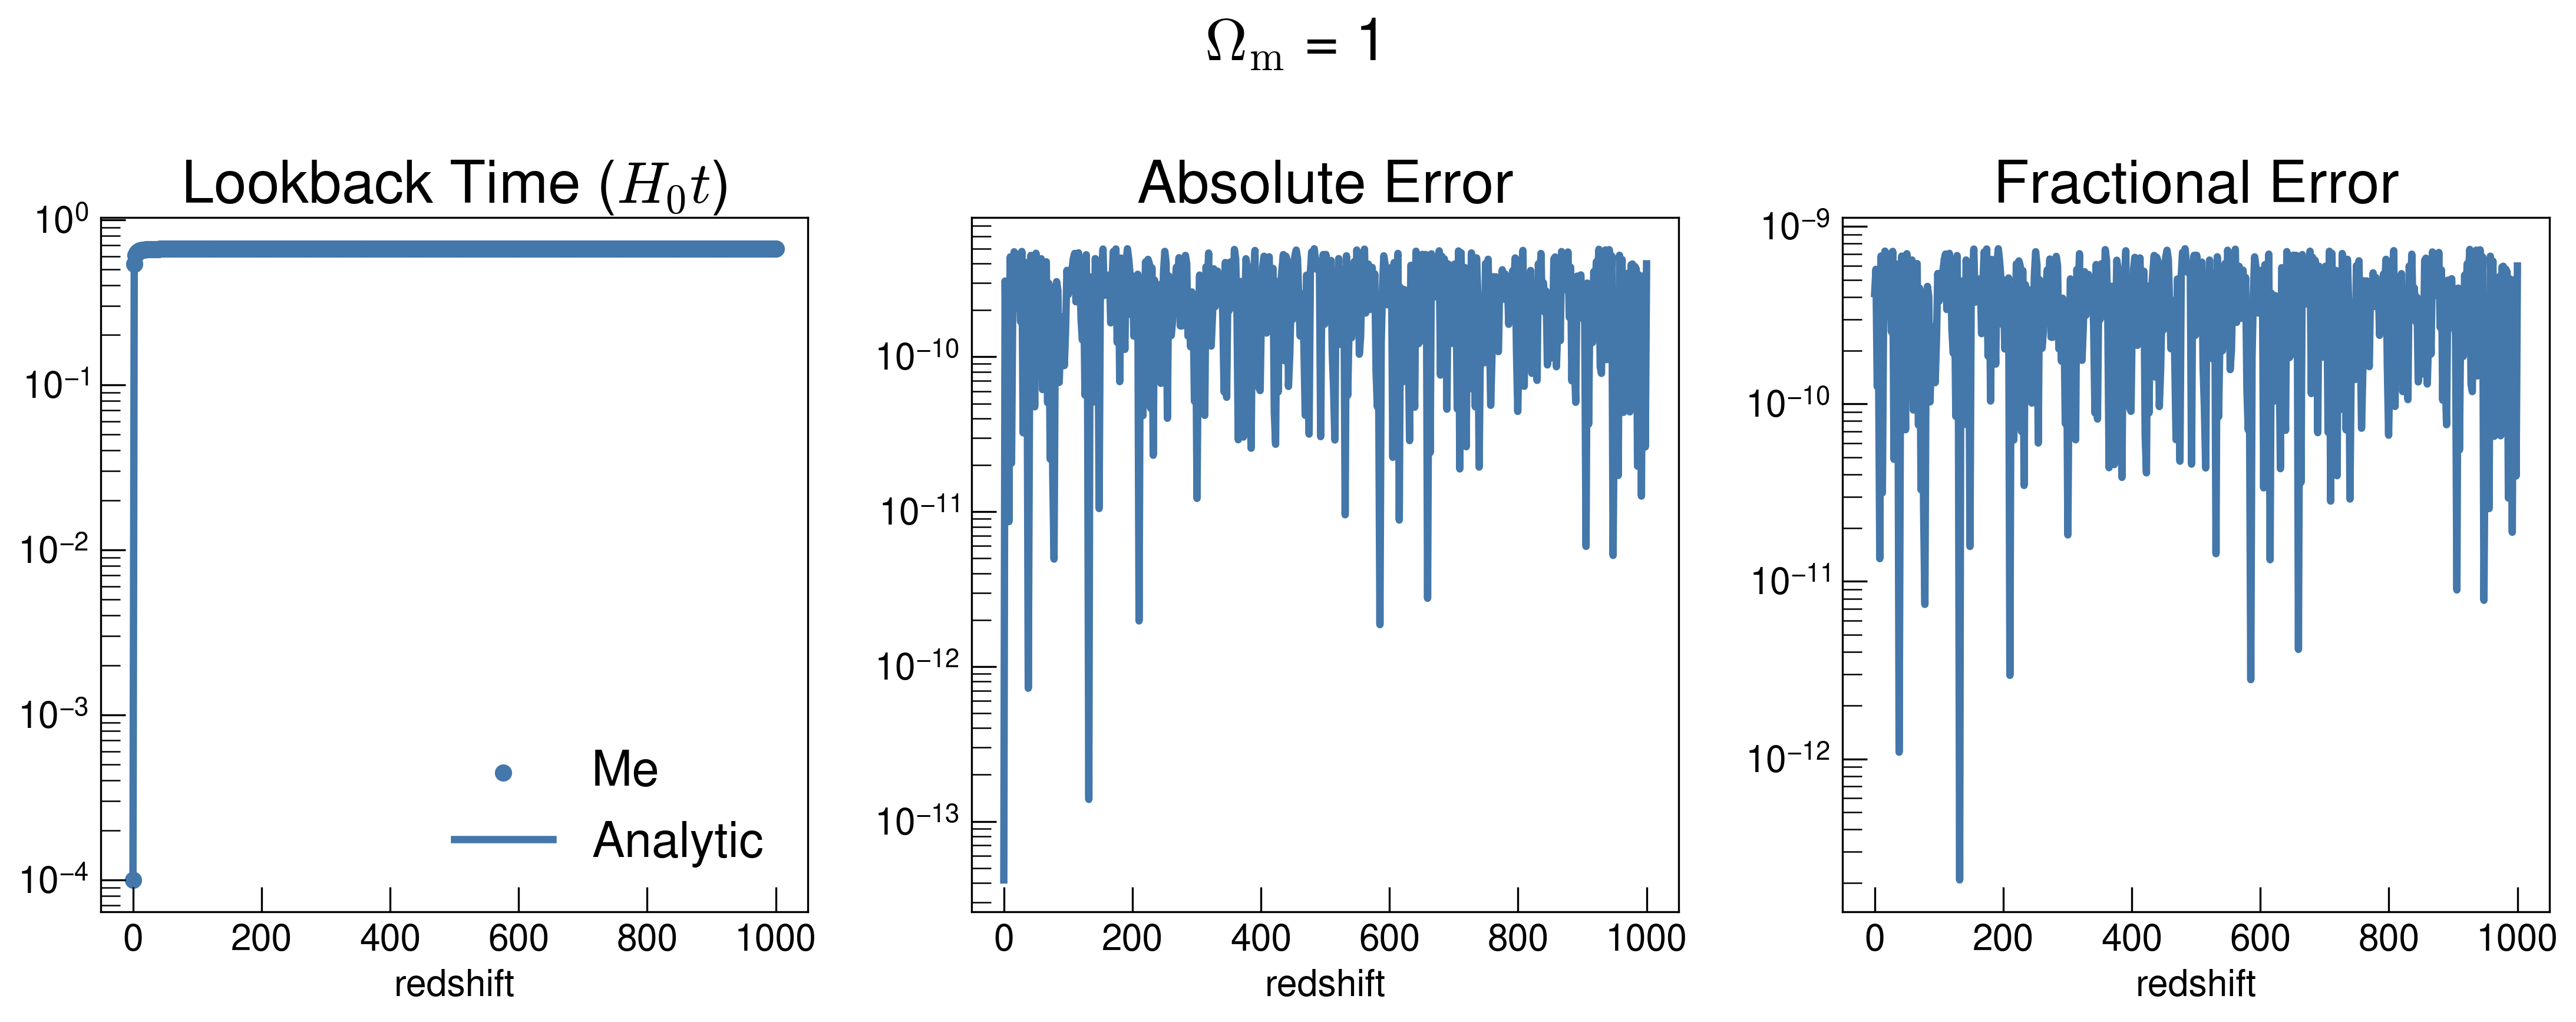

In [8]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(matter_cosmo.z_arr, matter_cosmo.time_look, label='Me')
ax[0].plot(matter_cosmo.z_arr, lookback_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Lookback Time ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(matter_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(matter_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\rm{m}}$ = 1")

fig.tight_layout()

In [9]:
age_analytic = matter_cosmo.age_analytical(matter_cosmo.z_arr)
abs_err = np.abs(matter_cosmo.time_age - age_analytic)
frac_err = abs_err/age_analytic

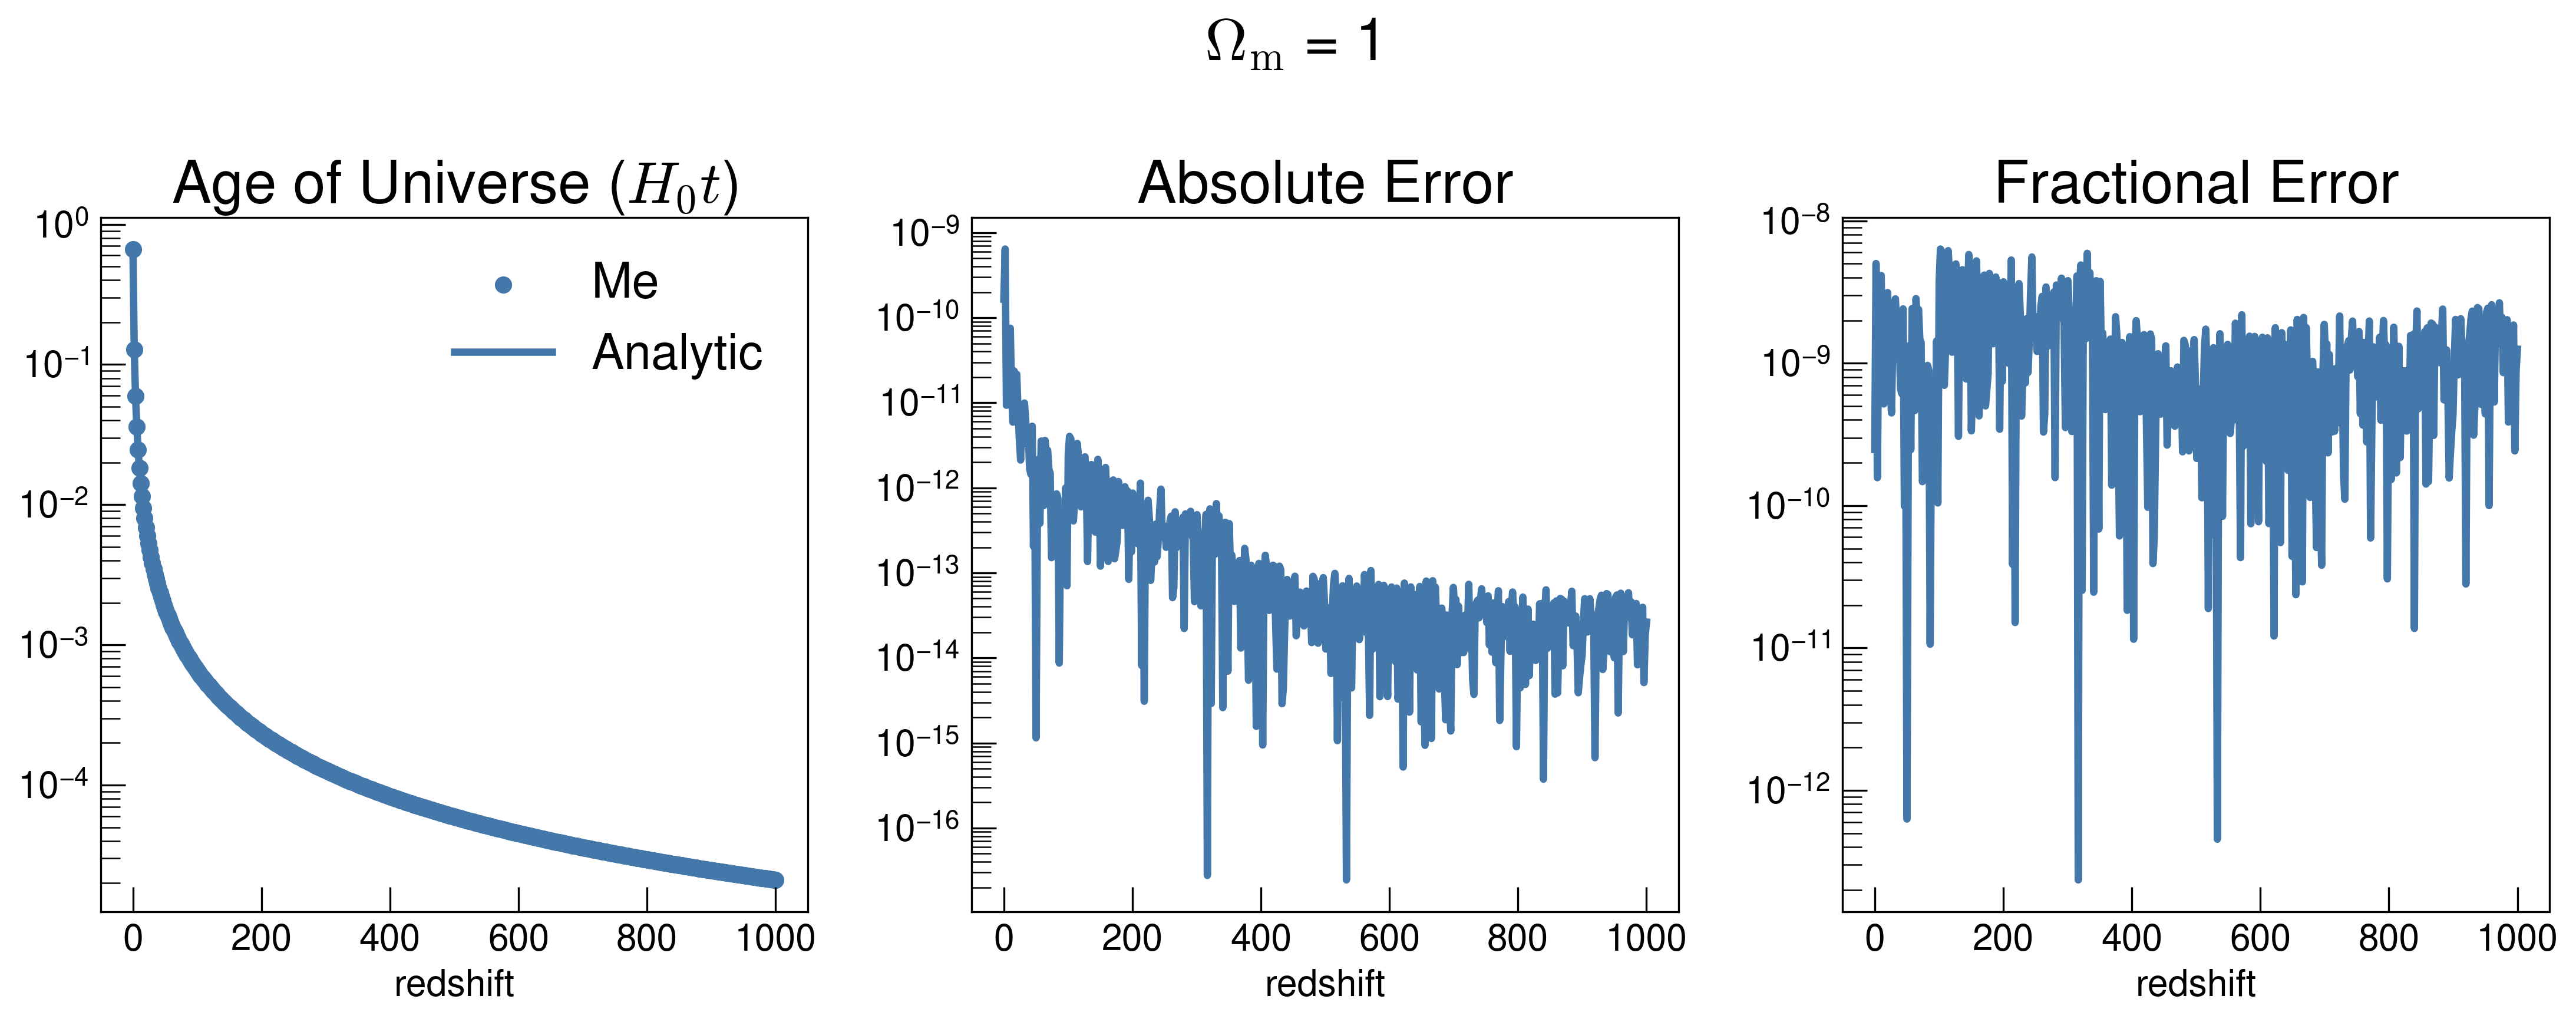

In [10]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(matter_cosmo.z_arr, matter_cosmo.time_age, label='Me')
ax[0].plot(matter_cosmo.z_arr, age_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Age of Universe ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(matter_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(matter_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\rm{m}}$ = 1")

fig.tight_layout()

In [11]:
conf_age_analytic = matter_cosmo.conformal_age_analytical(matter_cosmo.z_arr)
abs_err = np.abs(matter_cosmo.time_confage - conf_age_analytic)
frac_err = abs_err/conf_age_analytic

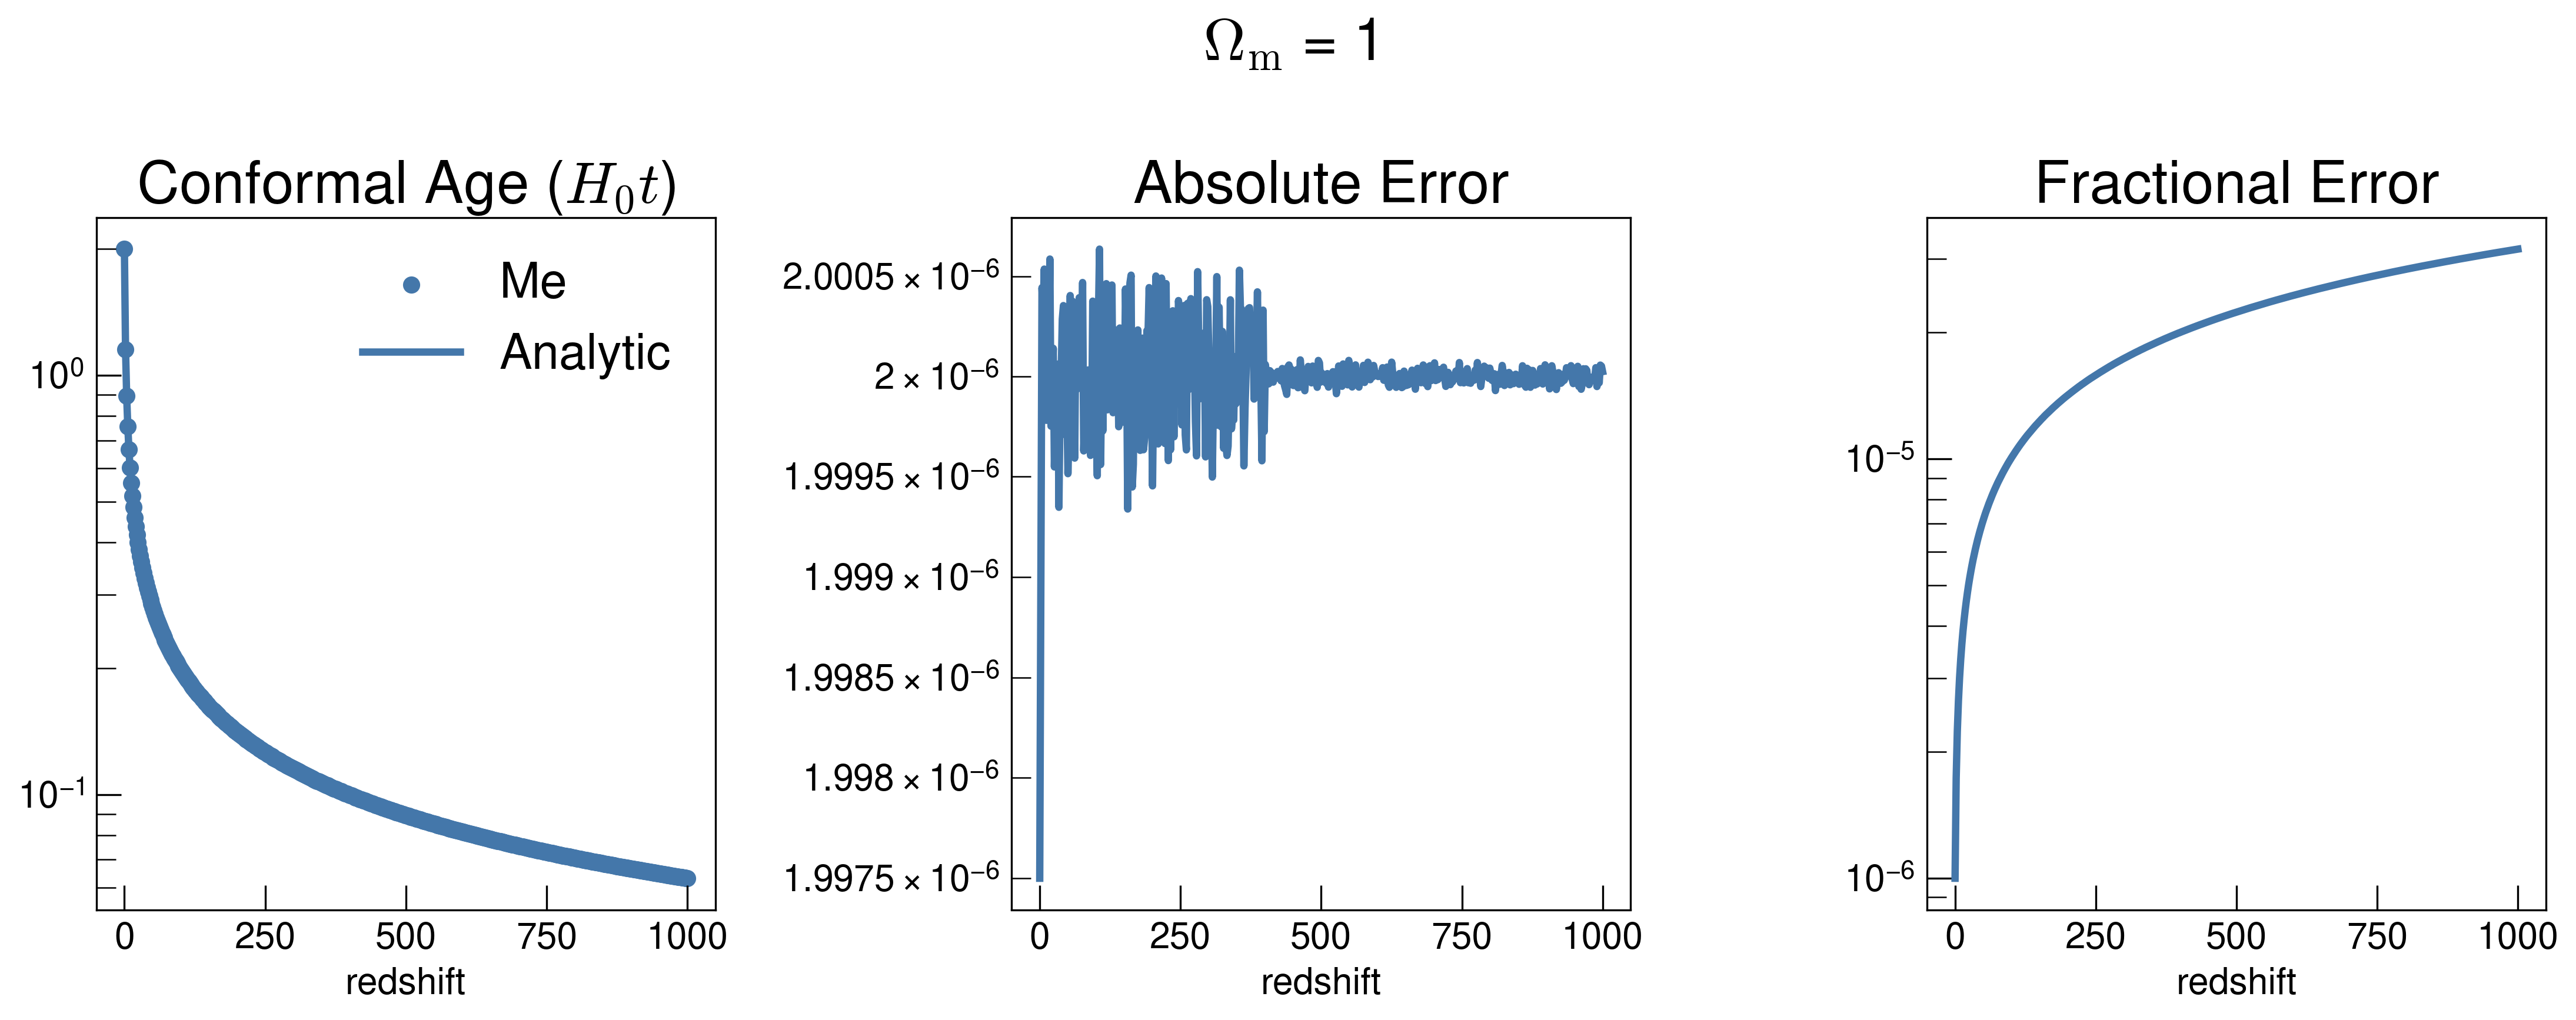

In [12]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(matter_cosmo.z_arr, matter_cosmo.time_confage, label='Me')
ax[0].plot(matter_cosmo.z_arr, conf_age_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Conformal Age ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(matter_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(matter_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\rm{m}}$ = 1")

fig.tight_layout()

In [13]:
conf_analytic = matter_cosmo.conformal_analytical(matter_cosmo.z_arr)
abs_err = np.abs(matter_cosmo.time_conf - conf_analytic)
frac_err = abs_err/conf_analytic

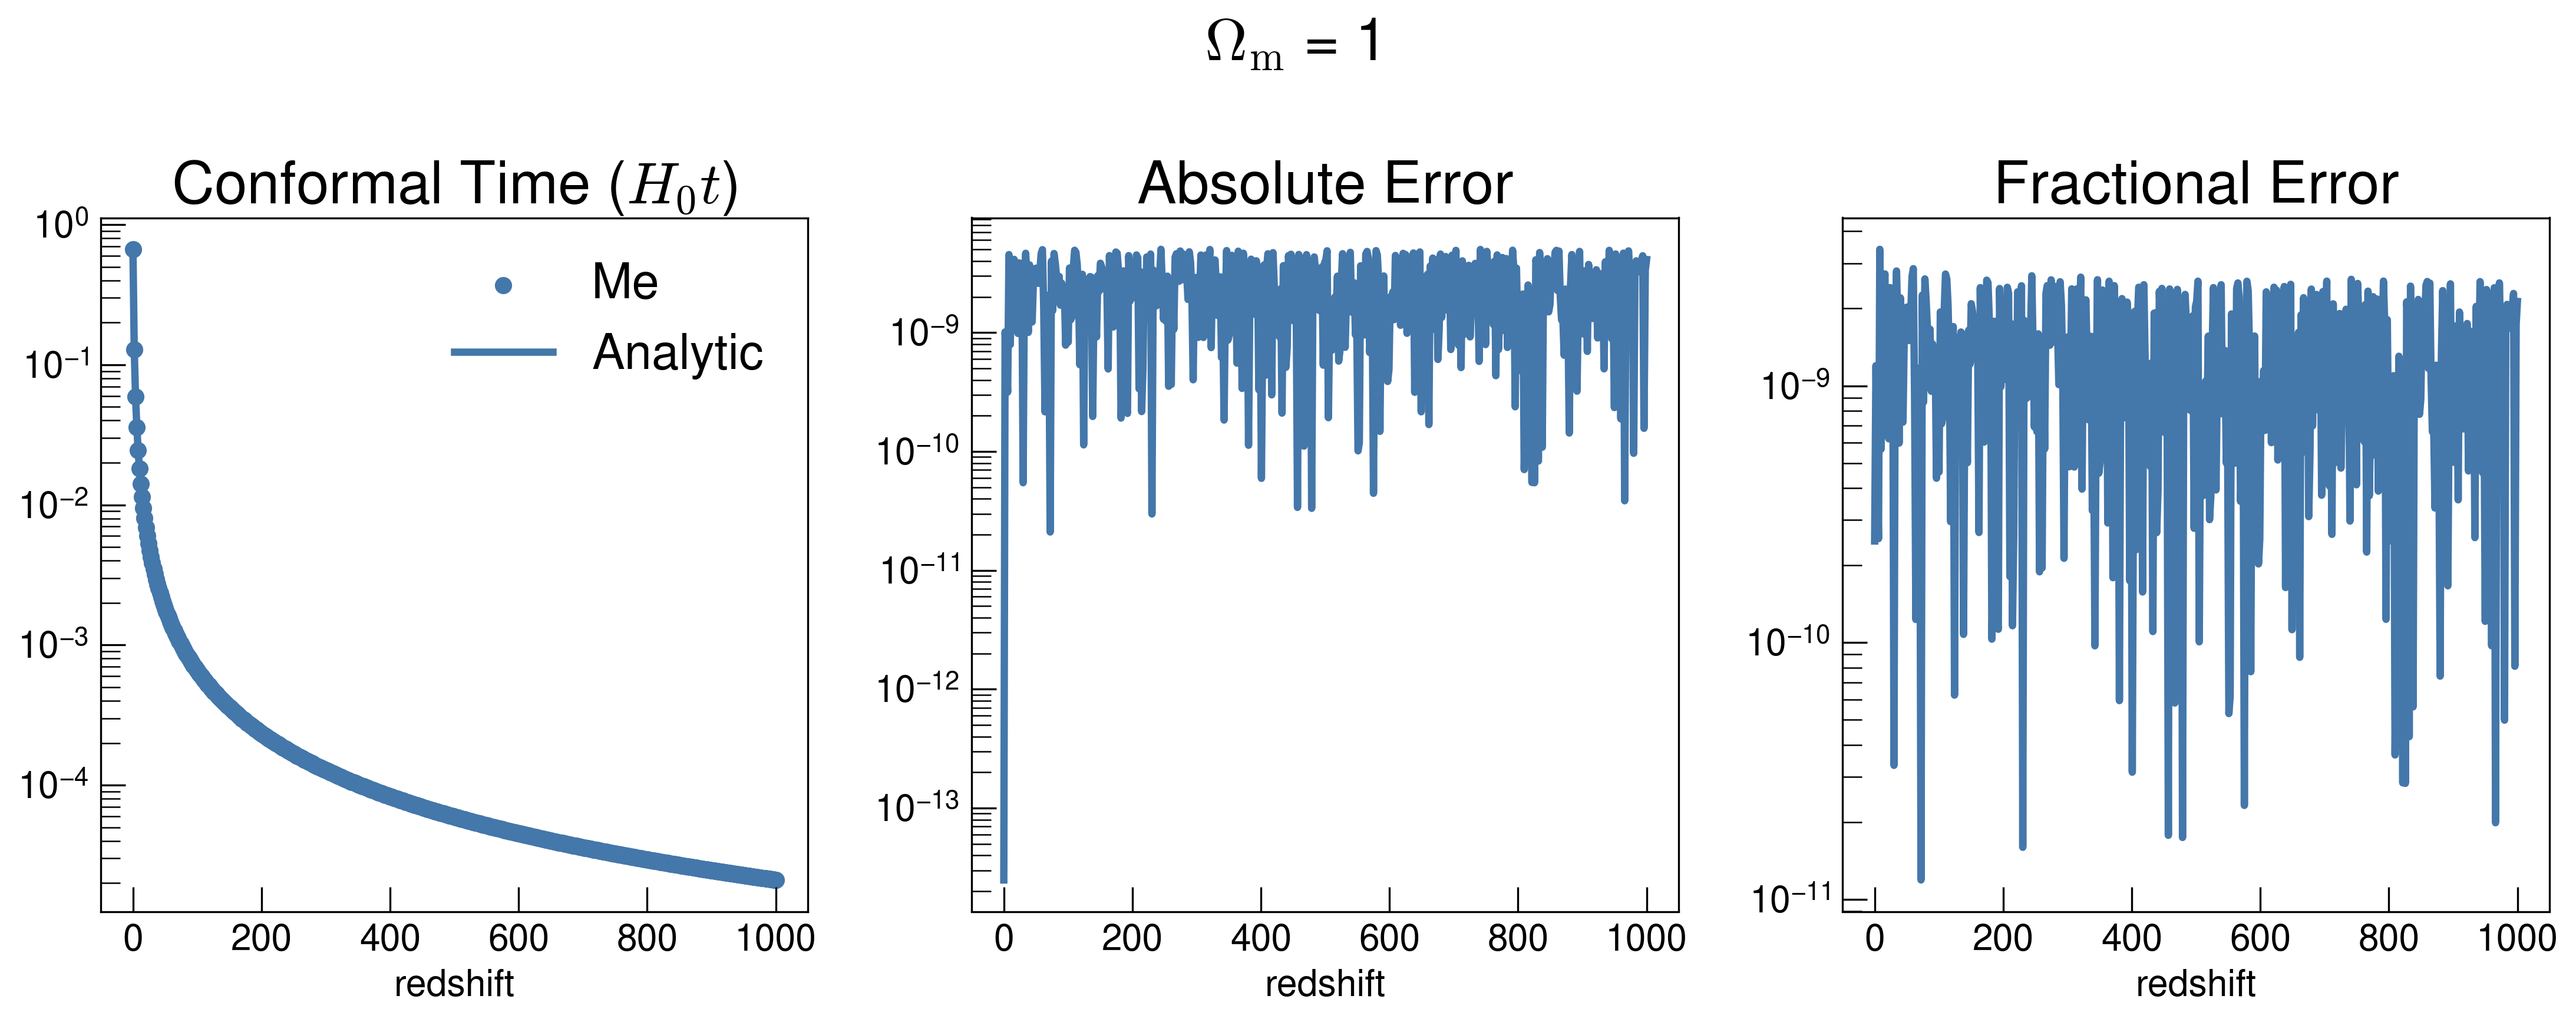

In [14]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(matter_cosmo.z_arr, matter_cosmo.time_age, label='Me')
ax[0].plot(matter_cosmo.z_arr, age_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Conformal Time ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(matter_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(matter_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\rm{m}}$ = 1")

fig.tight_layout()

## Radiation Dominated Universe

$$
\xi(z) = \sqrt{\Omega_{k}(1 + z)^{2} + \Omega_{\textrm{m}}(1 + z)^{3} + \Omega_{\textrm{R}}(1 + z)^{4} + \Omega_{\Lambda}} \rightarrow \xi(z) = \sqrt{\Omega_{\textrm{R}}} (1 + z)^{4/2} = \sqrt{\Omega_{\textrm{R}}} (1 + z)^{2}
$$

$$
\chi_{\textrm{conf}}(z) H_0 = \int_{0}^{z} \frac{1}{\xi(z')} \textrm{d}z' = \int_{0}^{z} \frac{1}{\sqrt{\Omega_{\textrm{R}}} (1 + z')^{2}} \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\textrm{R}}}} \int_{0}^{z} (1 + z')^{-2} \textrm{d}z'
$$

$$
\chi_{\textrm{conf}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{R}}}} \frac{-1}{1} (1+z')^{-1} \Bigr|_{0}^{z} = \frac{1}{\sqrt{\Omega_{\textrm{R}}}}  \left(\frac{1}{1 + z'} \right) \Bigr|_{z}^{0} = \frac{1}{\sqrt{\Omega_{\textrm{R}}}}  \left( \left(\frac{1}{1 + 0} \right) - \left(\frac{1}{1 + z} \right) \right)
$$

$$
\chi_{\textrm{conf}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{R}}}}  \left( 1 - (1 + z)^{-1} \right) 
$$

$$
\chi_{\textrm{age}}(z) H_0 = \int_{z}^{z_{\infty}} \frac{1}{\xi(z')} \textrm{d}z' = \int_{z}^{z_{\infty}} \frac{1}{\sqrt{\Omega_{\textrm{R}}} (1 + z')^{2}} \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\textrm{R}}}} \int_{z}^{z_{\infty}} (1 + z')^{-2} \textrm{d}z'
$$

$$
\chi_{\textrm{age}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{R}}}} \frac{-1}{1} (1+z')^{-1} \Bigr|_{z}^{z_{\infty}} = \frac{1}{\sqrt{\Omega_{\textrm{R}}}}  \left(\frac{1}{1 + z'} \right) \Bigr|_{z_{\infty}}^{z} = \frac{1}{\sqrt{\Omega_{\textrm{R}}}}  \left( \left(\frac{1}{1 + z} \right) - \left(\frac{1}{1 + z_{\infty}} \right) \right)
$$

$$
\chi_{\textrm{age}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{R}}}}  \left( 1 + z \right)^{-1}
$$

$$
t_{\textrm{age}}(z) H_0 = \int_{z}^{z_{\infty}} \frac{1}{(1+z')\xi(z')} \textrm{d}z' = \int_{z}^{z_{\infty}} \frac{1}{(1+z') \sqrt{\Omega_{\textrm{R}}} (1 + z')^{2}} \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\textrm{R}}}} \int_{z}^{z_{\infty}} (1 + z')^{-3} \textrm{d}z'
$$

$$
t_{\textrm{age}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{R}}}} \frac{-1}{2} (1+z')^{-2} \Bigr|_{z}^{z_{\infty}} = \frac{1}{2\sqrt{\Omega_{\textrm{R}}}} (1+z')^{-2} \Bigr|_{z_{\infty}}^{z} = \frac{1}{2\sqrt{\Omega_{\textrm{R}}}}  \left( \left(\frac{1}{1 + z} \right)^{2} - \left(\frac{1}{1 + z_{\infty}} \right)^{2} \right)
$$

$$
t_{\textrm{age}}(z) H_0 = \frac{1}{2 \sqrt{\Omega_{\textrm{R}}}}  (1 + z)^{-2}
$$

$$
t_{\textrm{look}}(z) H_0 = \int_{0}^{z} \frac{1}{(1+z')\xi(z')} \textrm{d}z' = \int_{0}^{z} \frac{1}{(1+z') \sqrt{\Omega_{\textrm{R}}} (1 + z')^{2}} \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\textrm{R}}}} \int_{0}^{z} (1 + z')^{-3} \textrm{d}z'
$$

$$
t_{\textrm{look}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{R}}}} \frac{-1}{2} (1+z')^{-2} \Bigr|_{0}^{z} = \frac{1}{2\sqrt{\Omega_{\textrm{R}}}} (1+z')^{-2} \Bigr|_{z}^{0} = \frac{1}{2\sqrt{\Omega_{\textrm{R}}}}  \left( \left(\frac{1}{1 + 0} \right)^{2} - \left(\frac{1}{1 + z} \right)^{2} \right)
$$

$$
t_{\textrm{look}}(z) H_0 = \frac{1}{2 \sqrt{\Omega_{\textrm{R}}}}  \left( 1 - (1 + z)^{-2} \right) 
$$

In [15]:
class FlatRadiationCosmology:
    
    def __init__(self, table_radiation_fname):
        self.fname = table_radiation_fname
        self.set_arrs()
        
    def set_arrs(self):
        '''
        Place attributes of the redshift, lookback, age, conformal time, conformal age
        
        Assumes table is saved with values at cols: 0,3,4,5,6
        '''
        table = np.loadtxt(self.fname, skiprows=10, delimiter = ',')

        self.z_arr = table[:,0]

        self.time_look = table[:,3]
        self.time_look_Gyr = self.time_look / H0_cgs / GYRS_CGS
        
        self.time_age = table[:,4]
        self.time_age_Gyr = self.time_age / H0_cgs / GYRS_CGS

        self.time_conf = table[:,5]
        self.time_conf_Gyr = self.time_conf / H0_cgs / GYRS_CGS
        
        self.time_confage = table[:,6]
        self.time_confage_Gyr = self.time_confage / H0_cgs / GYRS_CGS

        
    def conformal_analytical(self, z):
        '''
        Analytically calculate the conformal time to a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return (1. - (1. + z)**(-1.))
    
    
    def conformal_age_analytical(self, z):
        '''
        Analytically calculate the conformal age at a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return (1. + z)**(-1.)
        
    
    def lookback_analytical(self, z):
        '''
        Analytically calculate the lookback time to a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return (1. / 2.) * (1. - (1. + z)**(-2.))

    
    def age_analytical(self, z):
        '''
        Analytically calculate the age at a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return (1. / 2.) * ((1. + z)**(-2.))

In [16]:
radiation_cosmo = FlatRadiationCosmology(table_Radiation_fname)

In [17]:
lookback_analytic = radiation_cosmo.lookback_analytical(radiation_cosmo.z_arr)
abs_err = np.abs(radiation_cosmo.time_look - lookback_analytic)
frac_err = abs_err/lookback_analytic

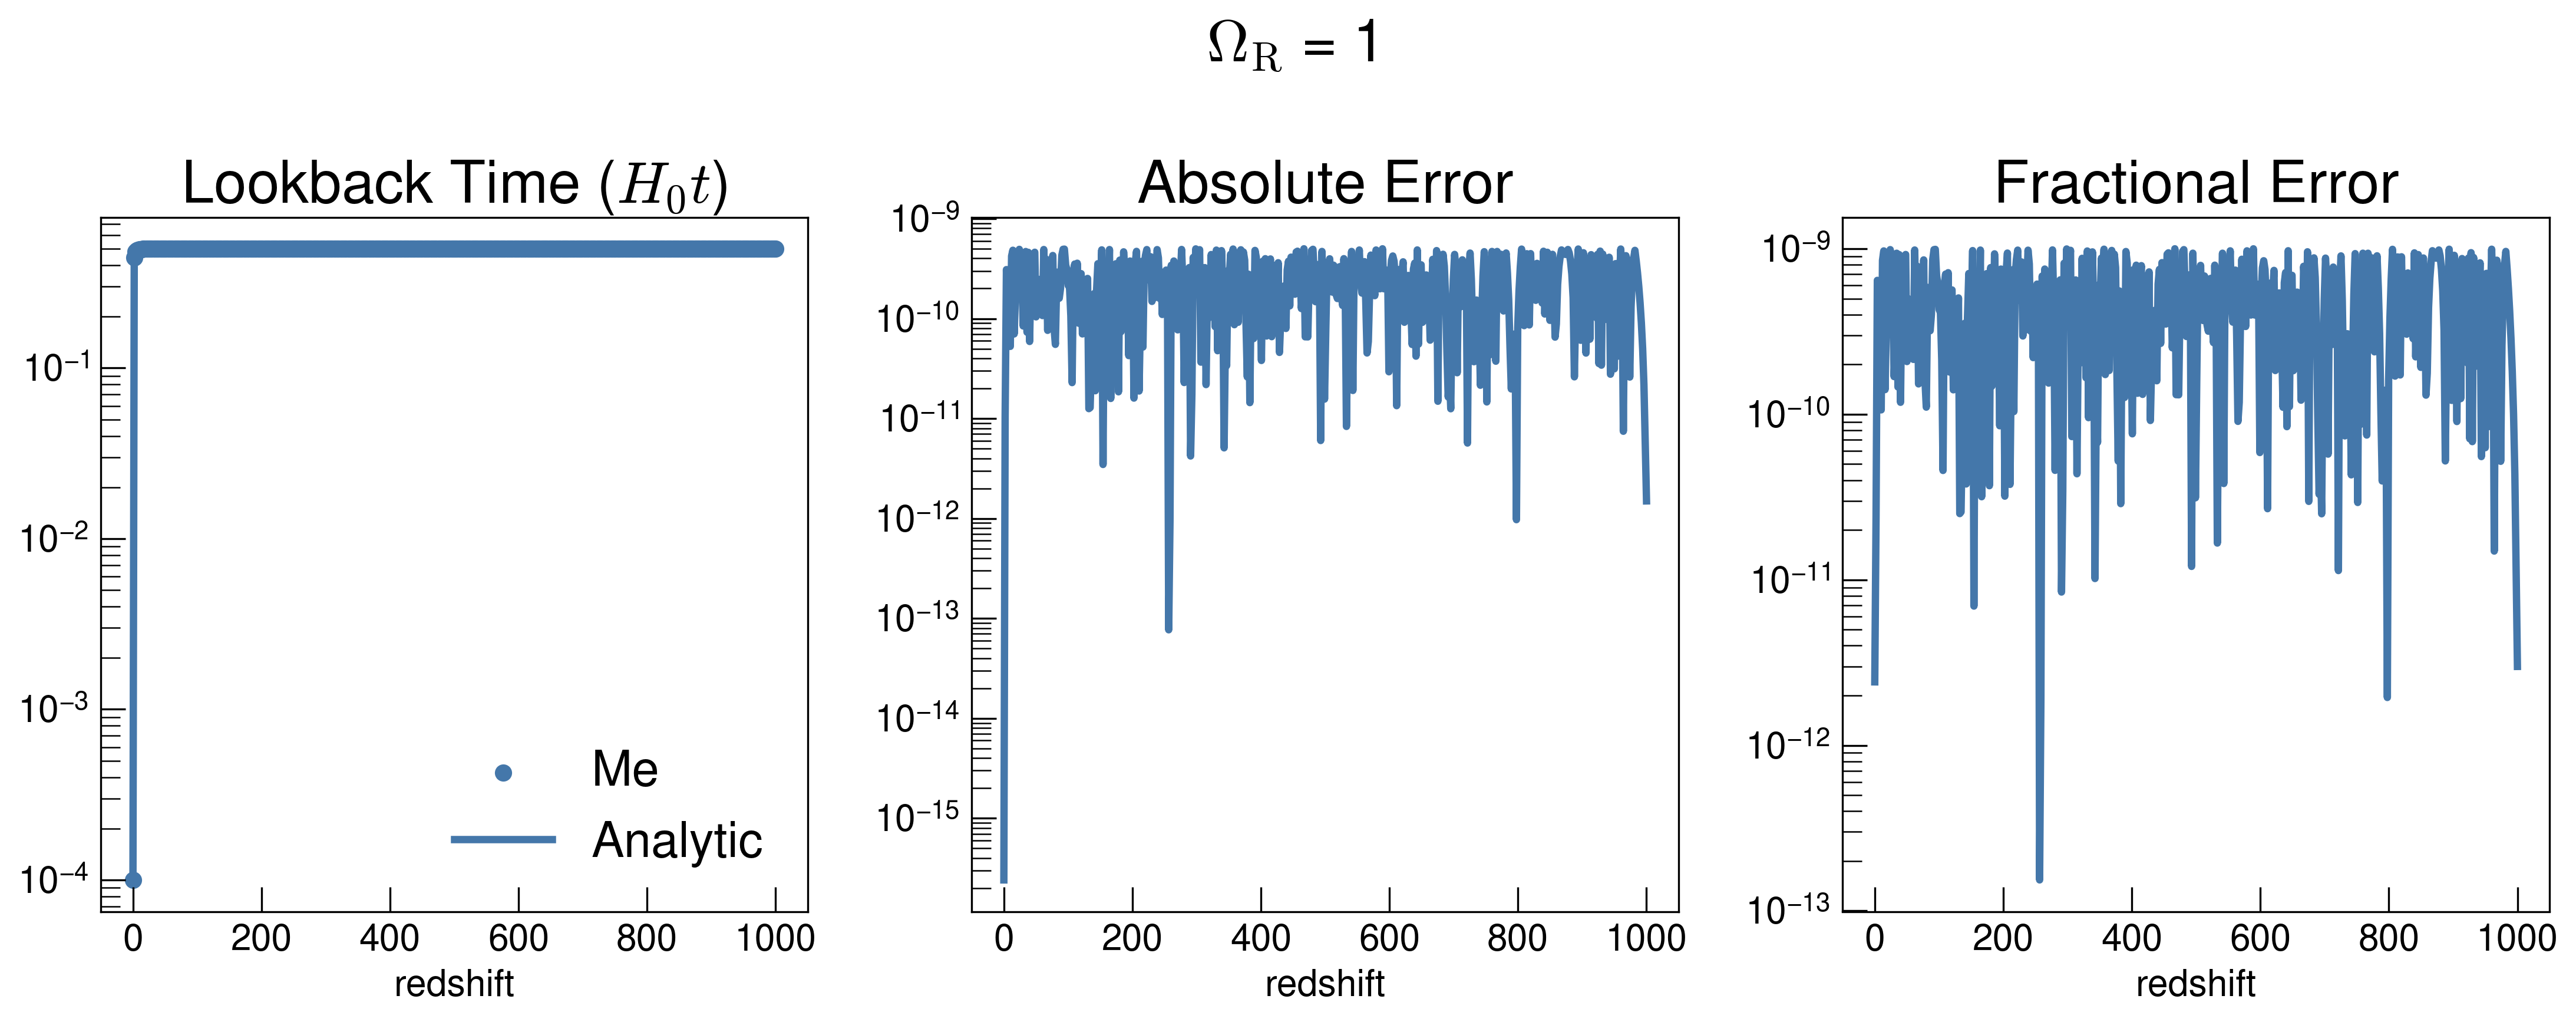

In [18]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(radiation_cosmo.z_arr, radiation_cosmo.time_look, label='Me')
ax[0].plot(radiation_cosmo.z_arr, lookback_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Lookback Time ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(radiation_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(radiation_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\rm{R}}$ = 1")

fig.tight_layout()

In [19]:
age_analytic = radiation_cosmo.age_analytical(radiation_cosmo.z_arr)
abs_err = np.abs(radiation_cosmo.time_age - age_analytic)
frac_err = abs_err/age_analytic

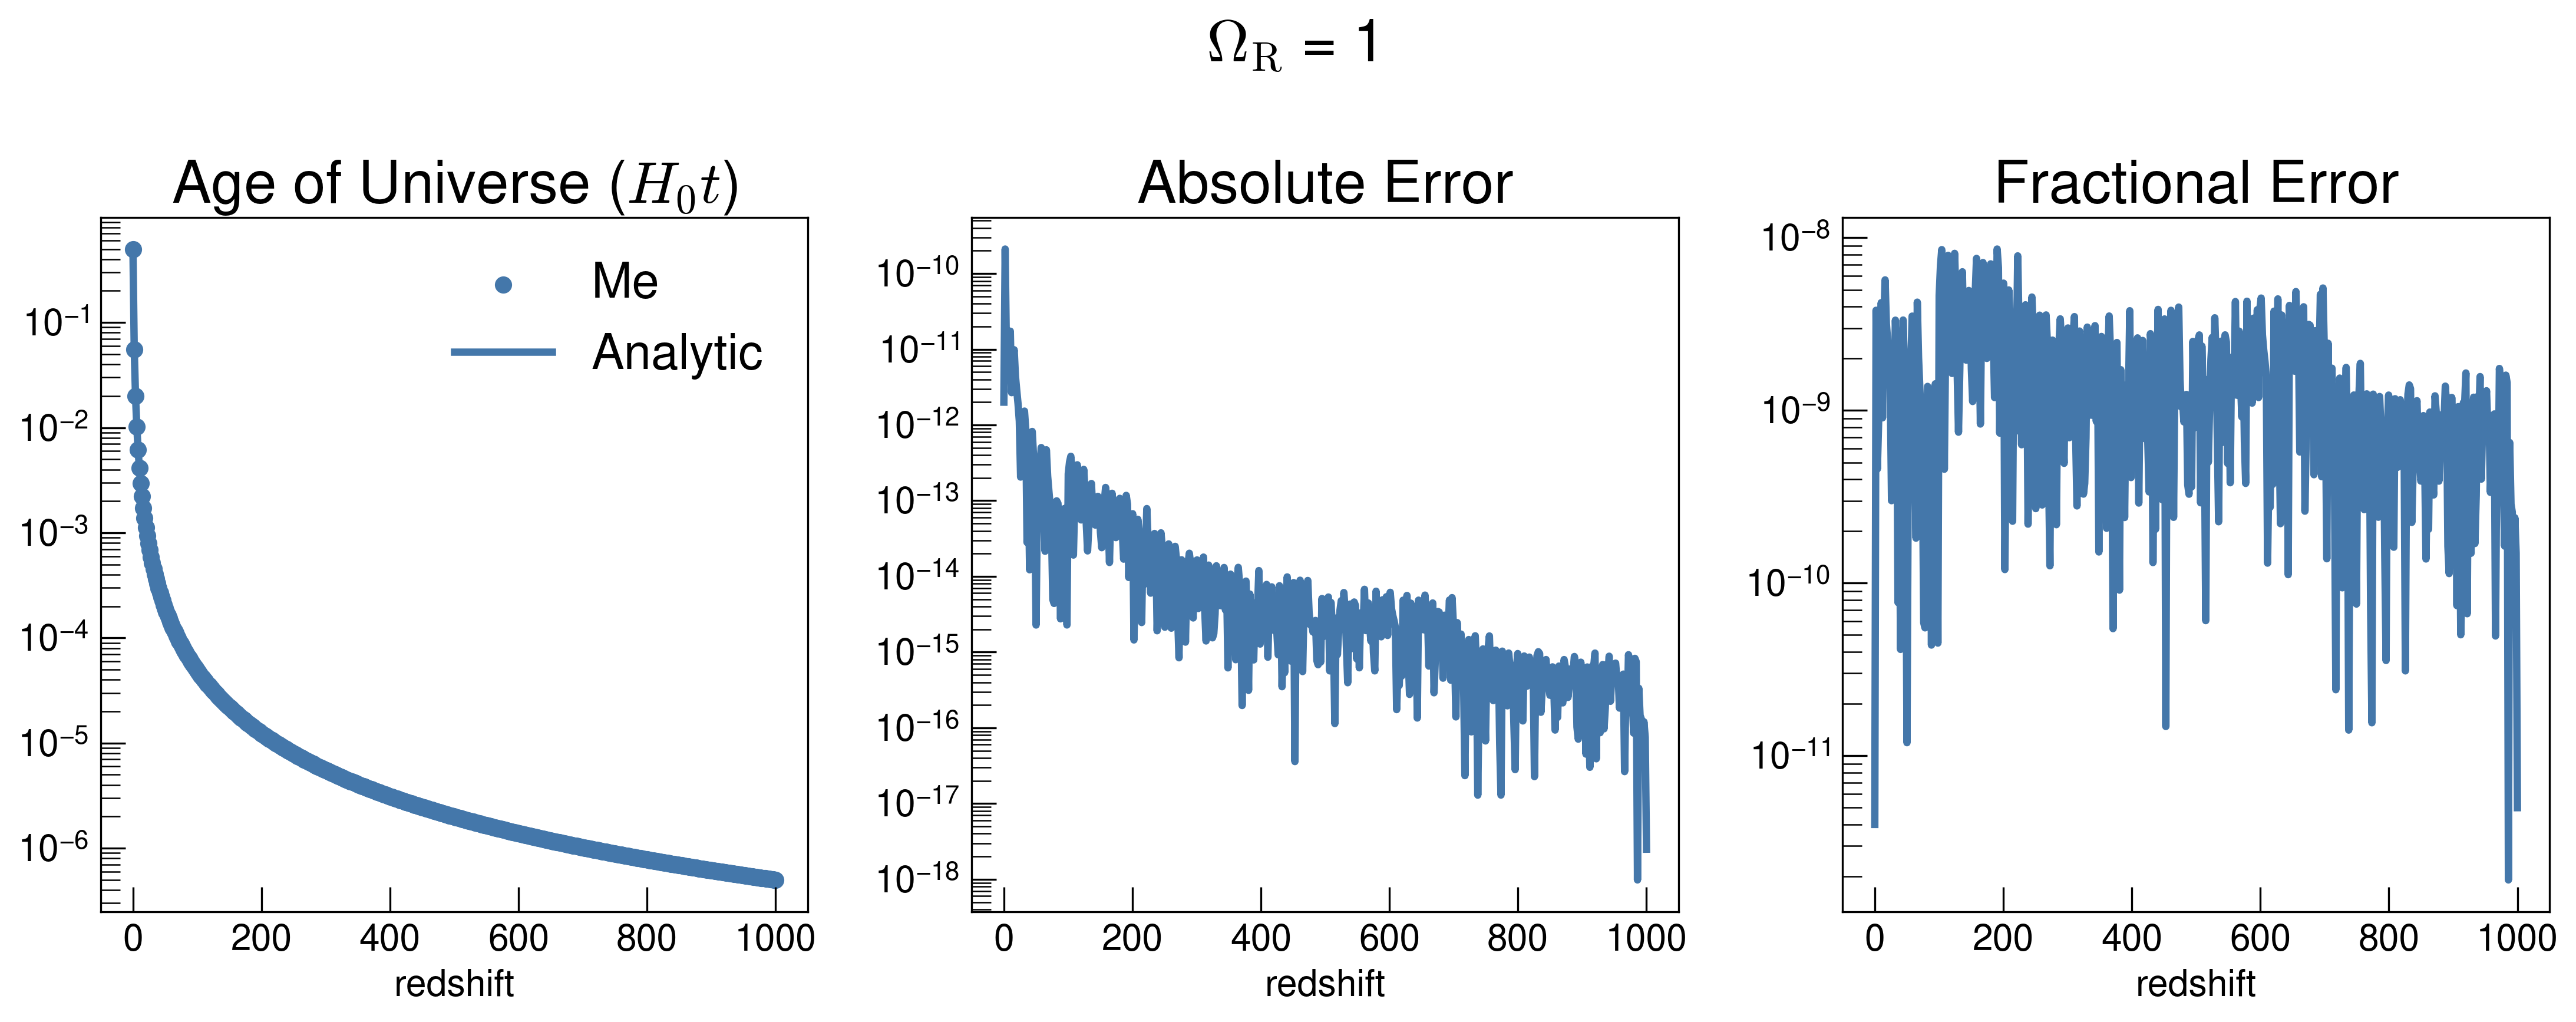

In [20]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(radiation_cosmo.z_arr, radiation_cosmo.time_age, label='Me')
ax[0].plot(radiation_cosmo.z_arr, age_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Age of Universe ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(radiation_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(radiation_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\rm{R}}$ = 1")

fig.tight_layout()

In [21]:
conf_age_analytic = radiation_cosmo.conformal_age_analytical(radiation_cosmo.z_arr)
abs_err = np.abs(radiation_cosmo.time_confage - conf_age_analytic)
frac_err = abs_err/conf_age_analytic

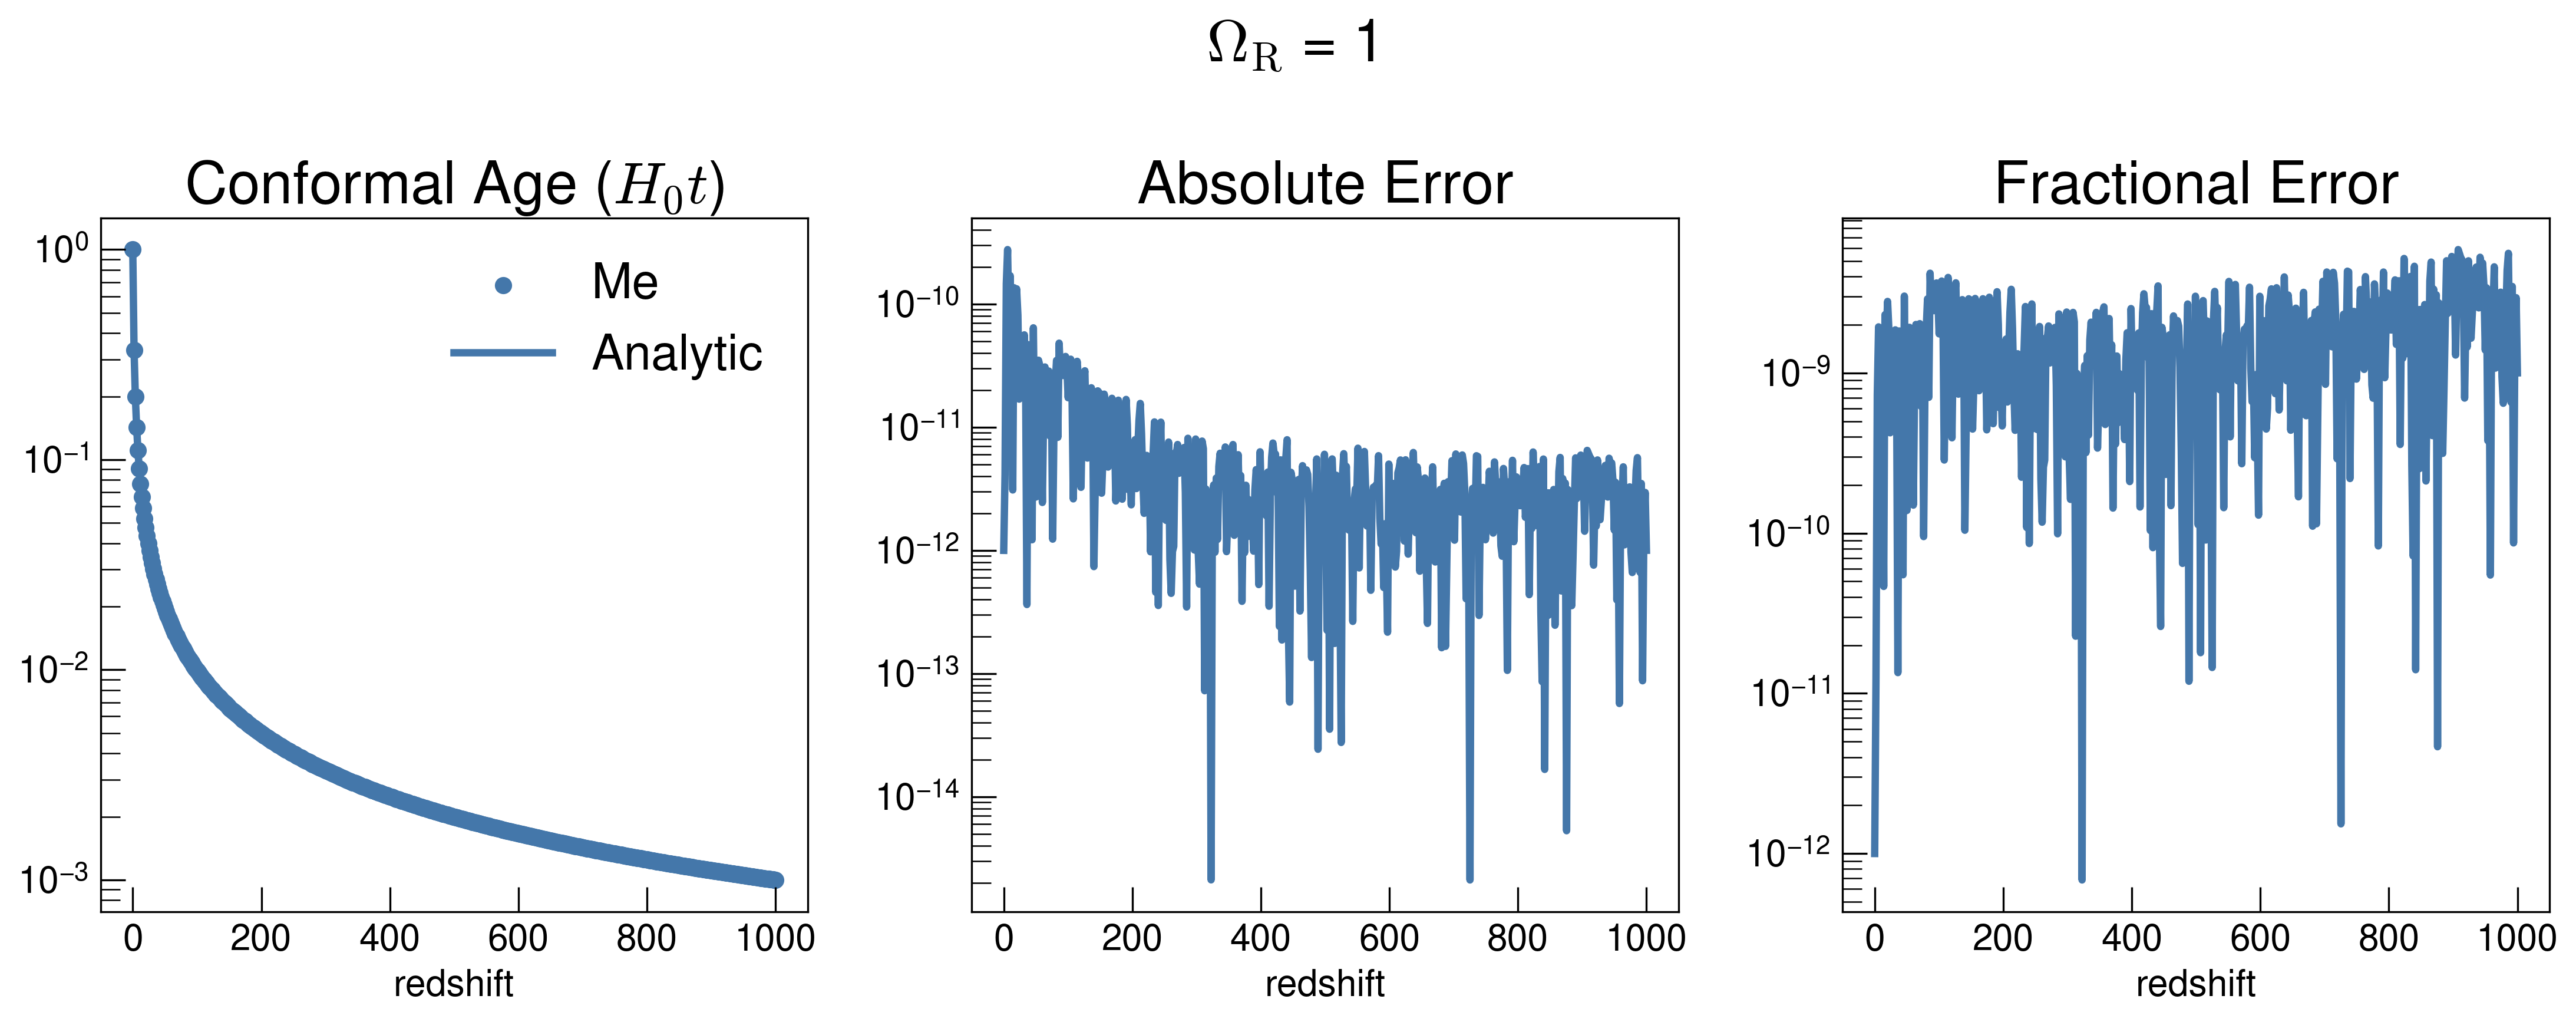

In [22]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(radiation_cosmo.z_arr, radiation_cosmo.time_confage, label='Me')
ax[0].plot(radiation_cosmo.z_arr, conf_age_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Conformal Age ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(radiation_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(radiation_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\rm{R}}$ = 1")

fig.tight_layout()

In [23]:
conf_analytic = radiation_cosmo.conformal_analytical(radiation_cosmo.z_arr)
abs_err = np.abs(radiation_cosmo.time_conf - conf_analytic)
frac_err = abs_err/conf_analytic

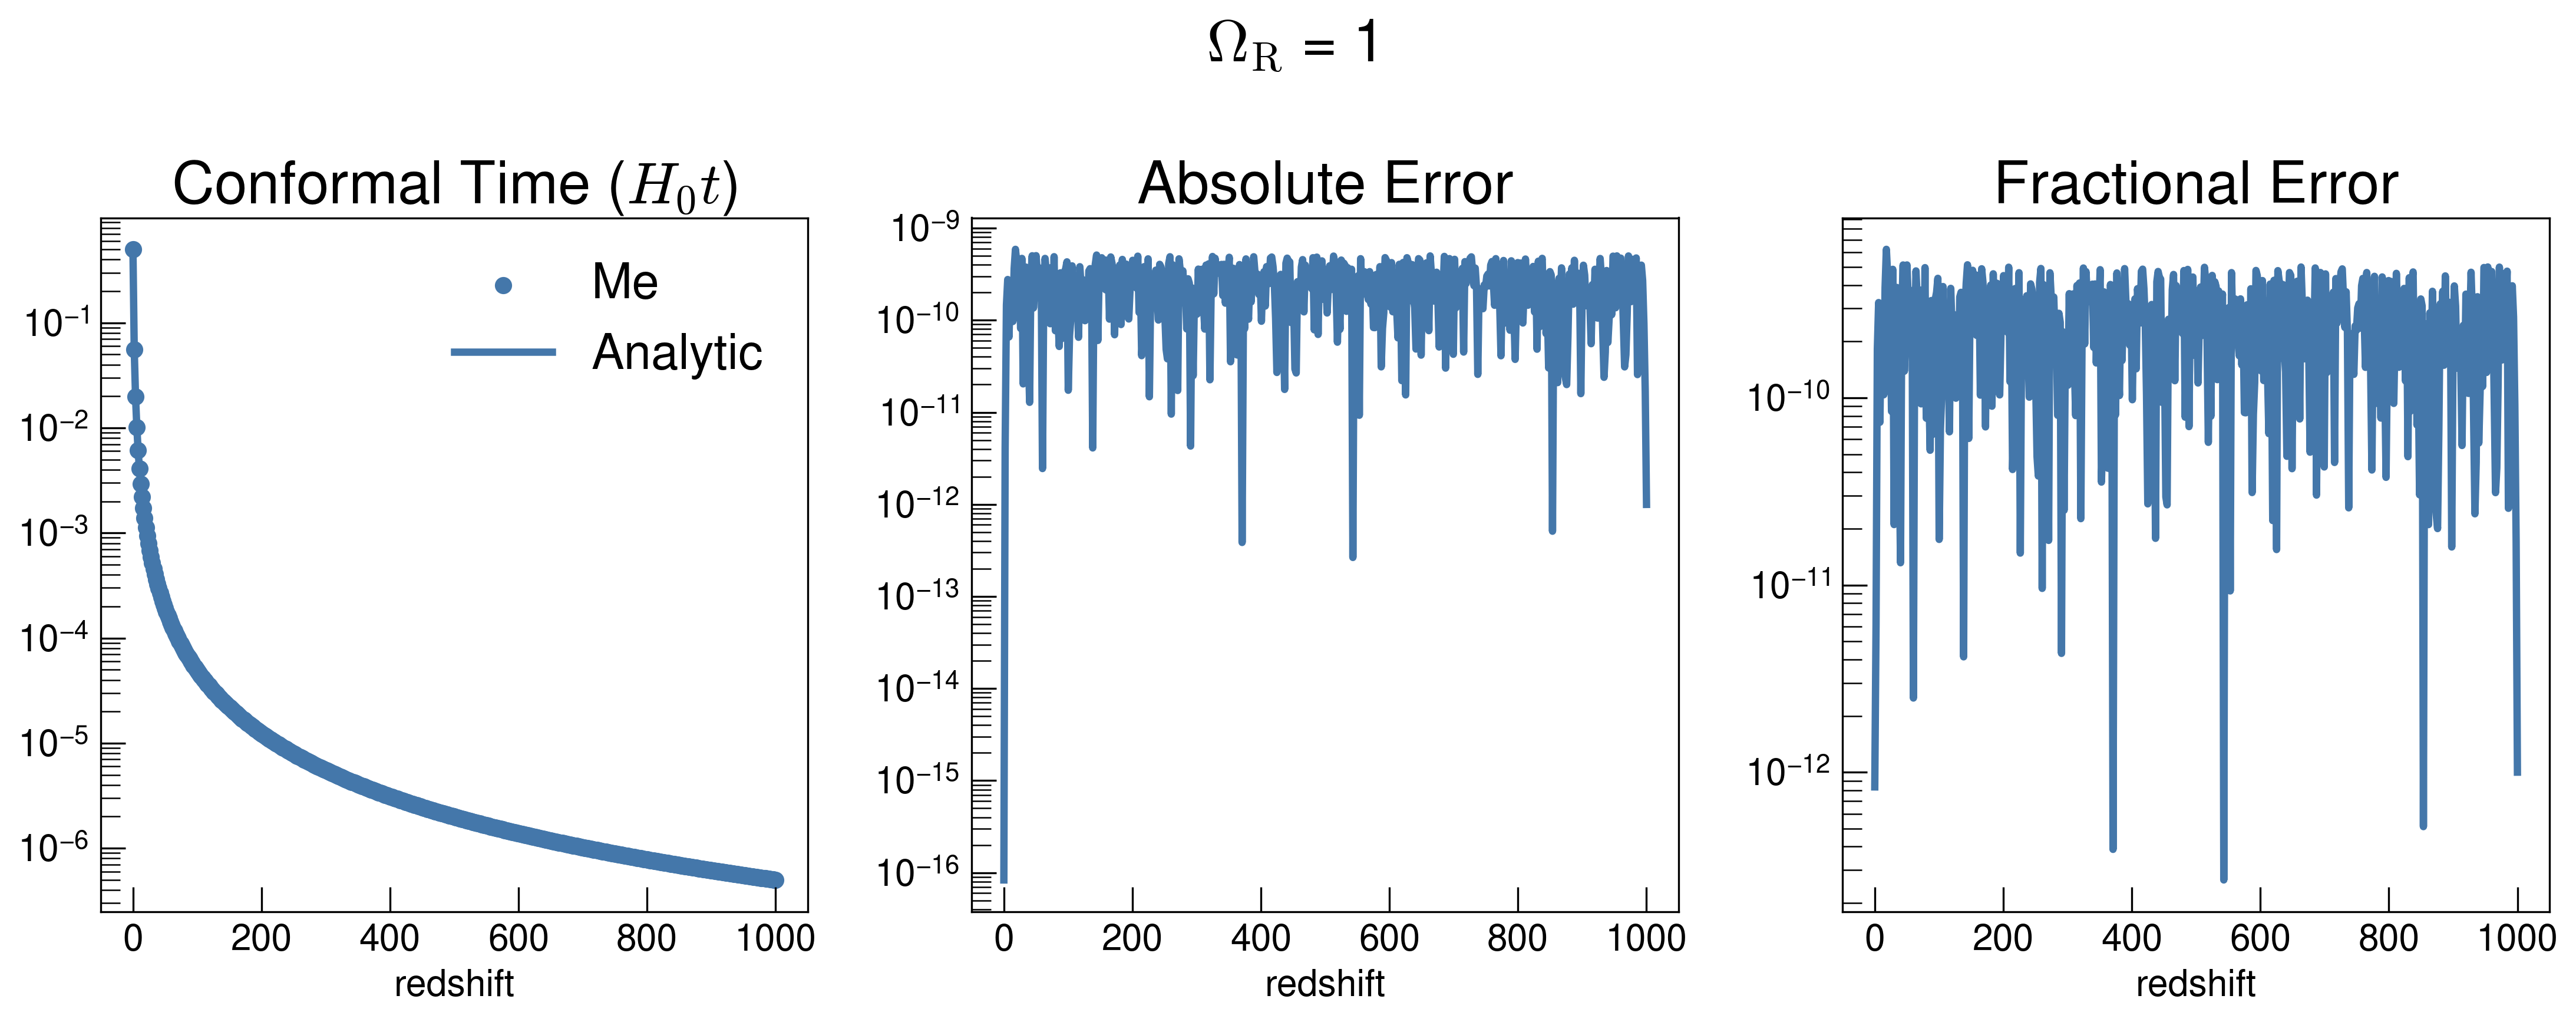

In [24]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(radiation_cosmo.z_arr, radiation_cosmo.time_age, label='Me')
ax[0].plot(radiation_cosmo.z_arr, age_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Conformal Time ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(radiation_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(radiation_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\rm{R}}$ = 1")

fig.tight_layout()

## Spatial Curvature Dominated Universe

$$
\xi(z) = \sqrt{\Omega_{k}(1 + z)^{2} + \Omega_{\textrm{m}}(1 + z)^{3} + \Omega_{\textrm{R}}(1 + z)^{4} + \Omega_{\Lambda}} \rightarrow \xi(z) = \sqrt{\Omega_{\textrm{k}}} (1 + z)^{2/2} = \sqrt{\Omega_{\textrm{R}}} (1 + z)
$$

$$
\chi_{\textrm{conf}}(z) H_0 = \int_{0}^{z} \frac{1}{\xi(z')} \textrm{d}z' = \int_{0}^{z} \frac{1}{\sqrt{\Omega_{\textrm{k}}} (1 + z')} \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\textrm{k}}}} \int_{0}^{z} (1 + z')^{-1} \textrm{d}z'
$$

$$
\chi_{\textrm{conf}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{k}}}} \ln(1+z') \Bigr|_{0}^{z} = \frac{1}{\sqrt{\Omega_{\textrm{k}}}} \left(\ln(1+z) - \ln(1+0) \right)
$$

$$
\chi_{\textrm{conf}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{k}}}} \ln(1+z)
$$

$$
\chi_{\textrm{age}}(z) H_0 = \int_{z}^{z_{\infty}} \frac{1}{\xi(z')} \textrm{d}z' = \int_{z}^{z_{\infty}} \frac{1}{\sqrt{\Omega_{\textrm{k}}} (1 + z')} \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\textrm{k}}}} \int_{z}^{z_{\infty}} (1 + z')^{-1} \textrm{d}z'
$$

$$
\chi_{\textrm{age}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{k}}}} \ln (1+z') \Bigr|_{z}^{z_{\infty}}
$$

$$
\chi_{\textrm{age}}(z) H_0 =  \frac{1}{\sqrt{\Omega_{\textrm{k}}}}  \bigl( \ln (1+z_{\infty}) - \ln (1+z) \bigr)
$$

$$
t_{\textrm{age}}(z) H_0 = \int_{z}^{z_{\infty}} \frac{1}{(1+z')\xi(z')} \textrm{d}z' = \int_{z}^{z_{\infty}} \frac{1}{(1+z') \sqrt{\Omega_{\textrm{k}}} (1 + z')} \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\textrm{k}}}} \int_{z}^{z_{\infty}} (1 + z')^{-2} \textrm{d}z'
$$

$$
t_{\textrm{age}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{k}}}} \frac{-1}{1} (1+z')^{-1} \Bigr|_{z}^{z_{\infty}} = \frac{1}{\sqrt{\Omega_{\textrm{k}}}} (1+z')^{-1} \Bigr|_{z_{\infty}}^{z} = \frac{1}{\sqrt{\Omega_{\textrm{k}}}}  \left( \left(\frac{1}{1 + z} \right) - \left(\frac{1}{1 + z_{\infty}} \right) \right)
$$

$$
t_{\textrm{age}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{k}}}}  (1 + z)^{-1}
$$

$$
t_{\textrm{look}}(z) H_0 = \int_{0}^{z} \frac{1}{(1+z')\xi(z')} \textrm{d}z' = \int_{0}^{z} \frac{1}{(1+z') \sqrt{\Omega_{\textrm{k}}} (1 + z')} \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\textrm{k}}}} \int_{0}^{z} (1 + z')^{-2} \textrm{d}z'
$$

$$
t_{\textrm{look}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{k}}}} \frac{-1}{1} (1+z')^{-1} \Bigr|_{0}^{z} = \frac{1}{\sqrt{\Omega_{\textrm{k}}}} (1+z')^{-1} \Bigr|_{z}^{0} = \frac{1}{\sqrt{\Omega_{\textrm{k}}}}  \left( \left(\frac{1}{1 + 0} \right) - \left(\frac{1}{1 + z} \right) \right)
$$

$$
t_{\textrm{look}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\textrm{k}}}}  \left( 1 - (1 + z)^{-1} \right) 
$$

In [25]:
class FlatCurvatureCosmology:
    
    def __init__(self, table_curvature_fname):
        self.fname = table_curvature_fname
        self.set_arrs()
        
    def set_arrs(self):
        '''
        Place attributes of the redshift, lookback, age, conformal time, conformal age
        
        Assumes table is saved with values at cols: 0,3,4,5,6
        '''
        table = np.loadtxt(self.fname, skiprows=10, delimiter = ',')

        self.z_arr = table[:,0]

        self.time_look = table[:,3]
        self.time_look_Gyr = self.time_look / H0_cgs / GYRS_CGS
        
        self.time_age = table[:,4]
        self.time_age_Gyr = self.time_age / H0_cgs / GYRS_CGS

        self.time_conf = table[:,5]
        self.time_conf_Gyr = self.time_conf / H0_cgs / GYRS_CGS
        
        self.time_confage = table[:,6]
        self.time_confage_Gyr = self.time_confage / H0_cgs / GYRS_CGS

        
    def conformal_analytical(self, z):
        '''
        Analytically calculate the conformal time to a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return np.log(1. + z)
    
    
    def conformal_age_analytical(self, z):
        '''
        Analytically calculate the conformal age at a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return np.log(1. + z_infty) - np.log(1. + z)
        
    
    def lookback_analytical(self, z):
        '''
        Analytically calculate the lookback time to a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return (1. - (1. + z)**(-1.))

    
    def age_analytical(self, z):
        '''
        Analytically calculate the age at a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return (1. + z)**(-1.)

In [26]:
curvature_cosmo = FlatCurvatureCosmology(table_Curvature_fname)

In [27]:
lookback_analytic = curvature_cosmo.lookback_analytical(curvature_cosmo.z_arr)
abs_err = np.abs(curvature_cosmo.time_look - lookback_analytic)
frac_err = abs_err/lookback_analytic

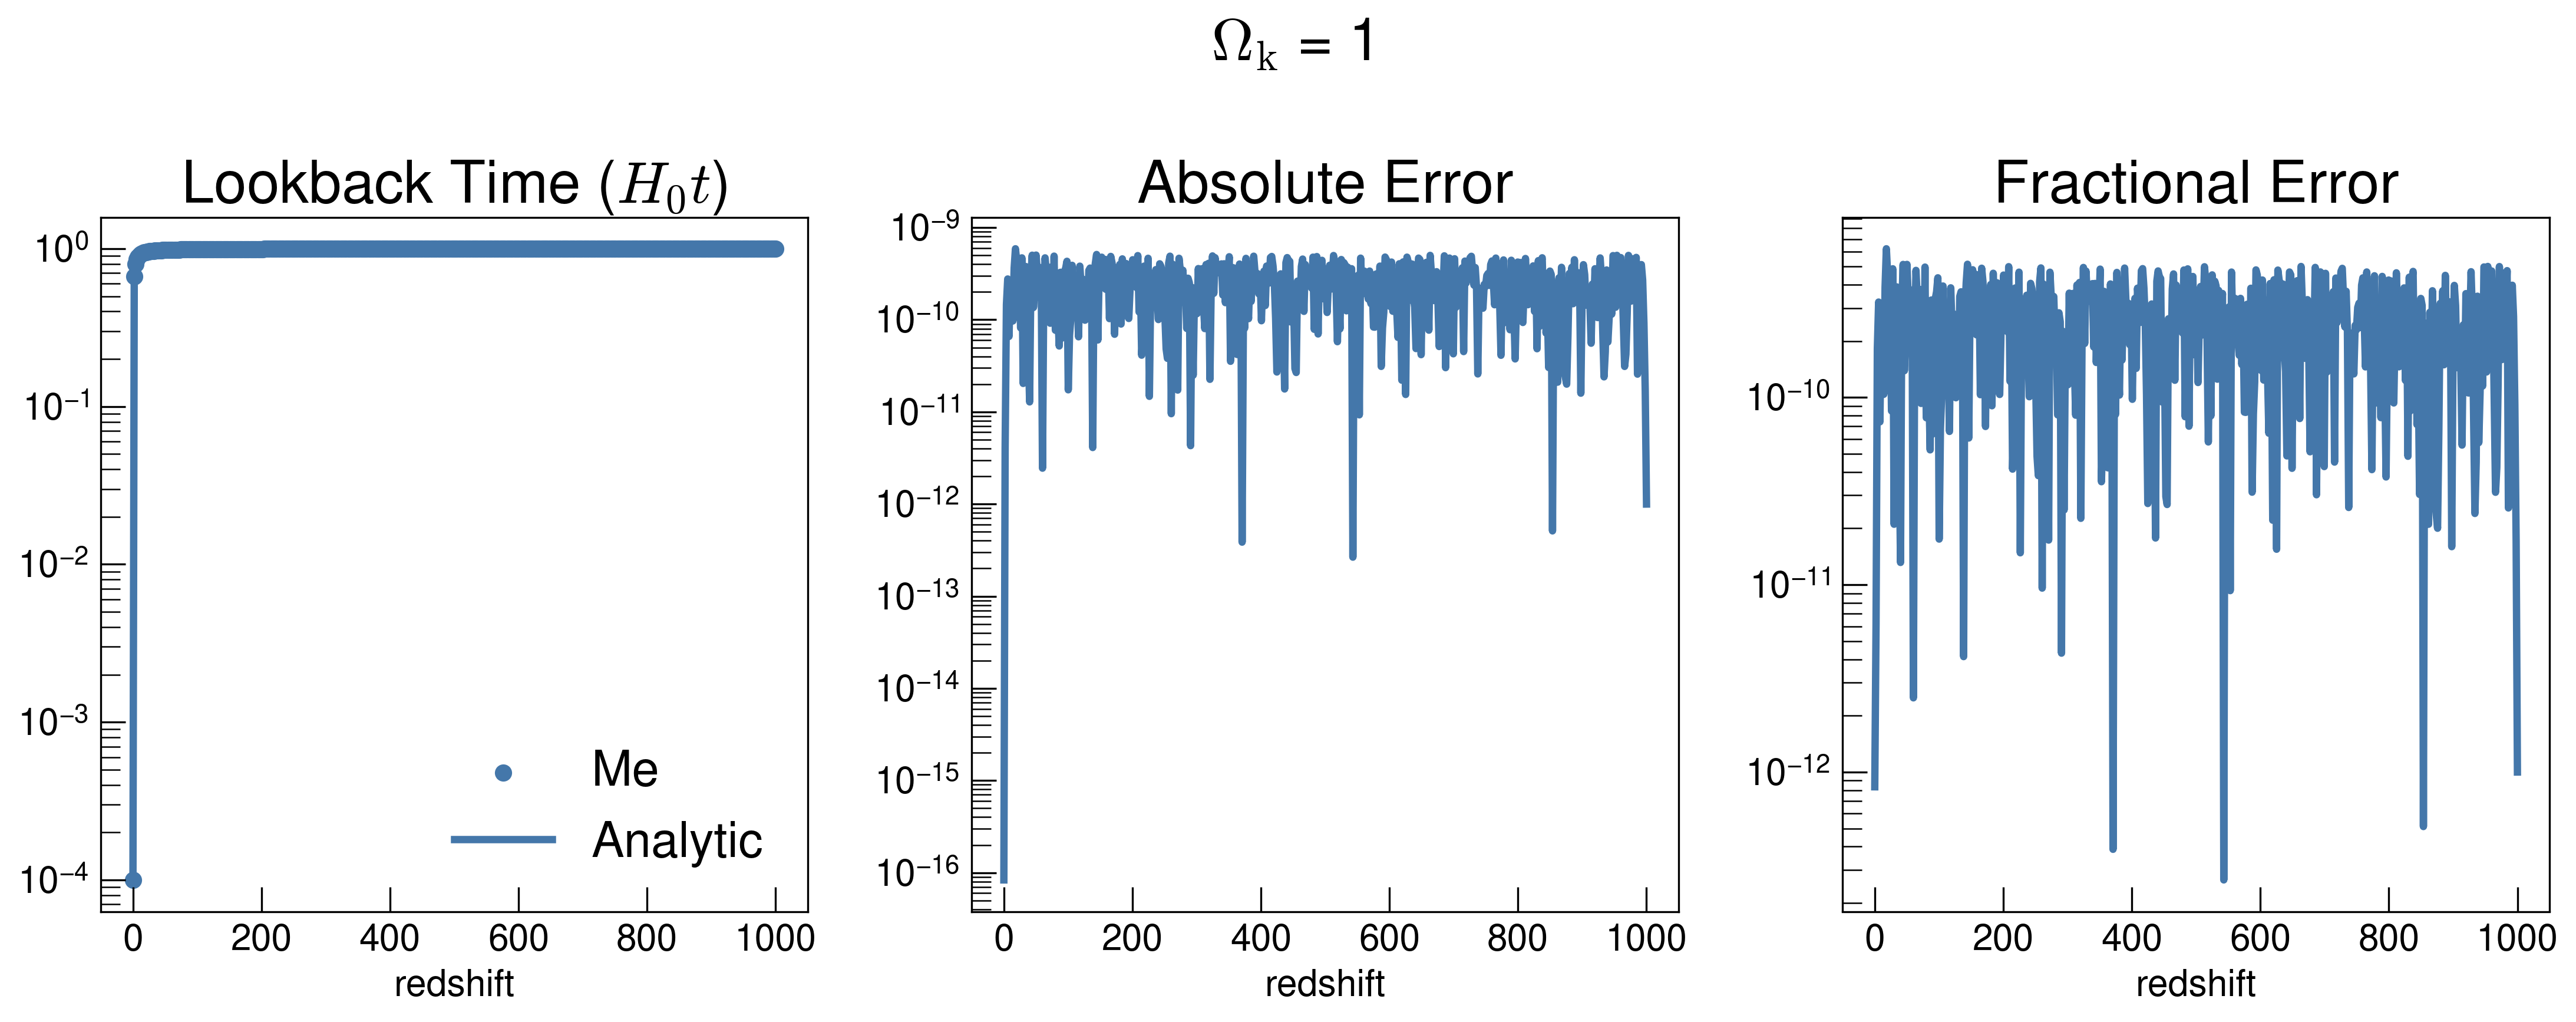

In [28]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(curvature_cosmo.z_arr, curvature_cosmo.time_look, label='Me')
ax[0].plot(curvature_cosmo.z_arr, lookback_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Lookback Time ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(curvature_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(curvature_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\rm{k}}$ = 1")

fig.tight_layout()

In [29]:
age_analytic = curvature_cosmo.age_analytical(curvature_cosmo.z_arr)
abs_err = np.abs(curvature_cosmo.time_age - age_analytic)
frac_err = abs_err/age_analytic

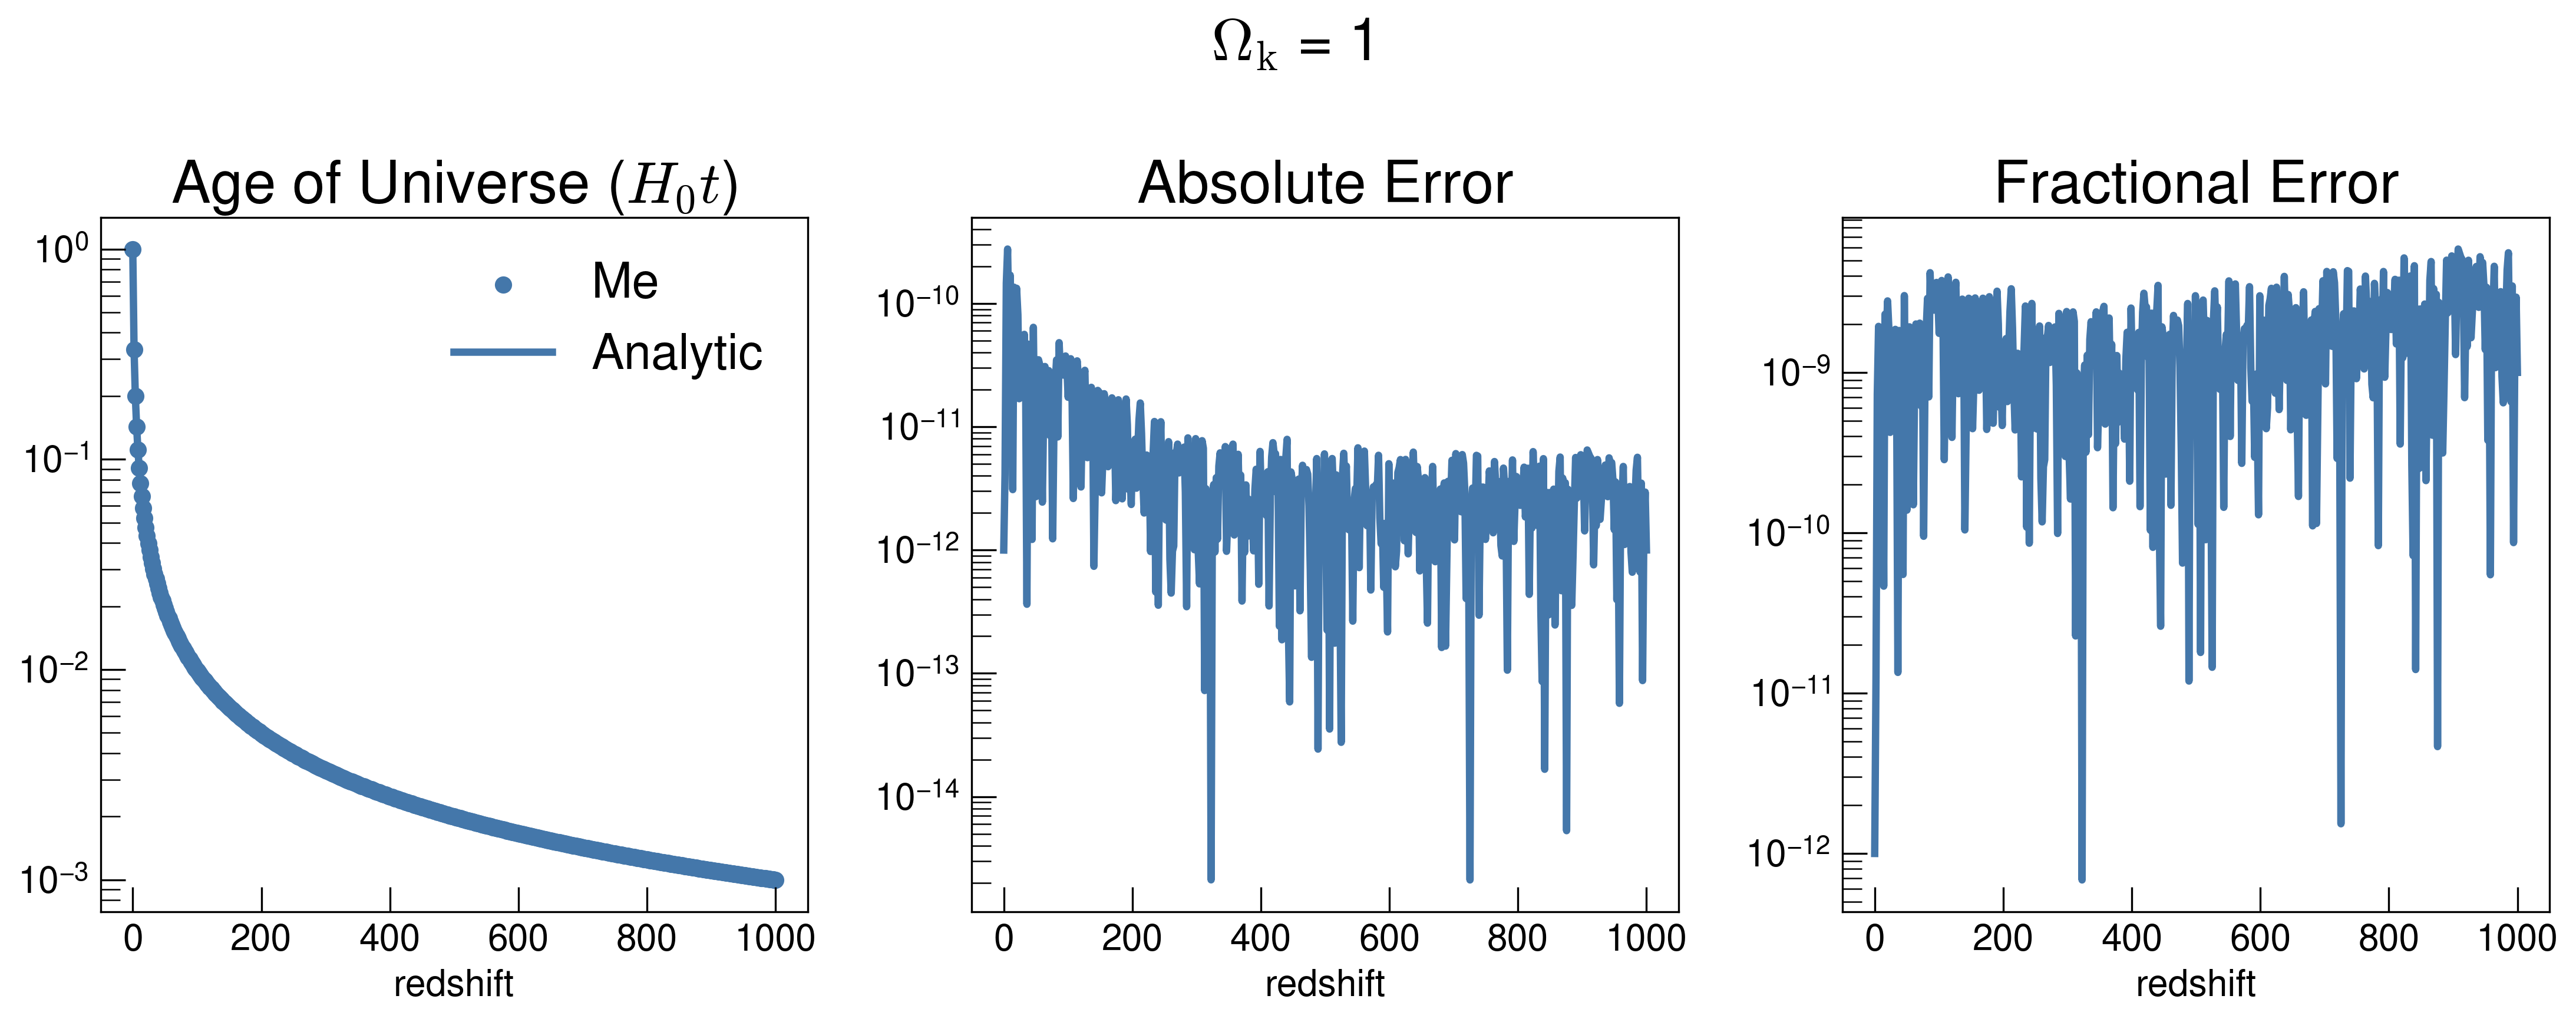

In [30]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(curvature_cosmo.z_arr, curvature_cosmo.time_age, label='Me')
ax[0].plot(curvature_cosmo.z_arr, age_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Age of Universe ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(curvature_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(curvature_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\rm{k}}$ = 1")

fig.tight_layout()

In [31]:
conf_age_analytic = curvature_cosmo.conformal_age_analytical(curvature_cosmo.z_arr)
abs_err = np.abs(curvature_cosmo.time_confage - conf_age_analytic)
frac_err = abs_err/conf_age_analytic

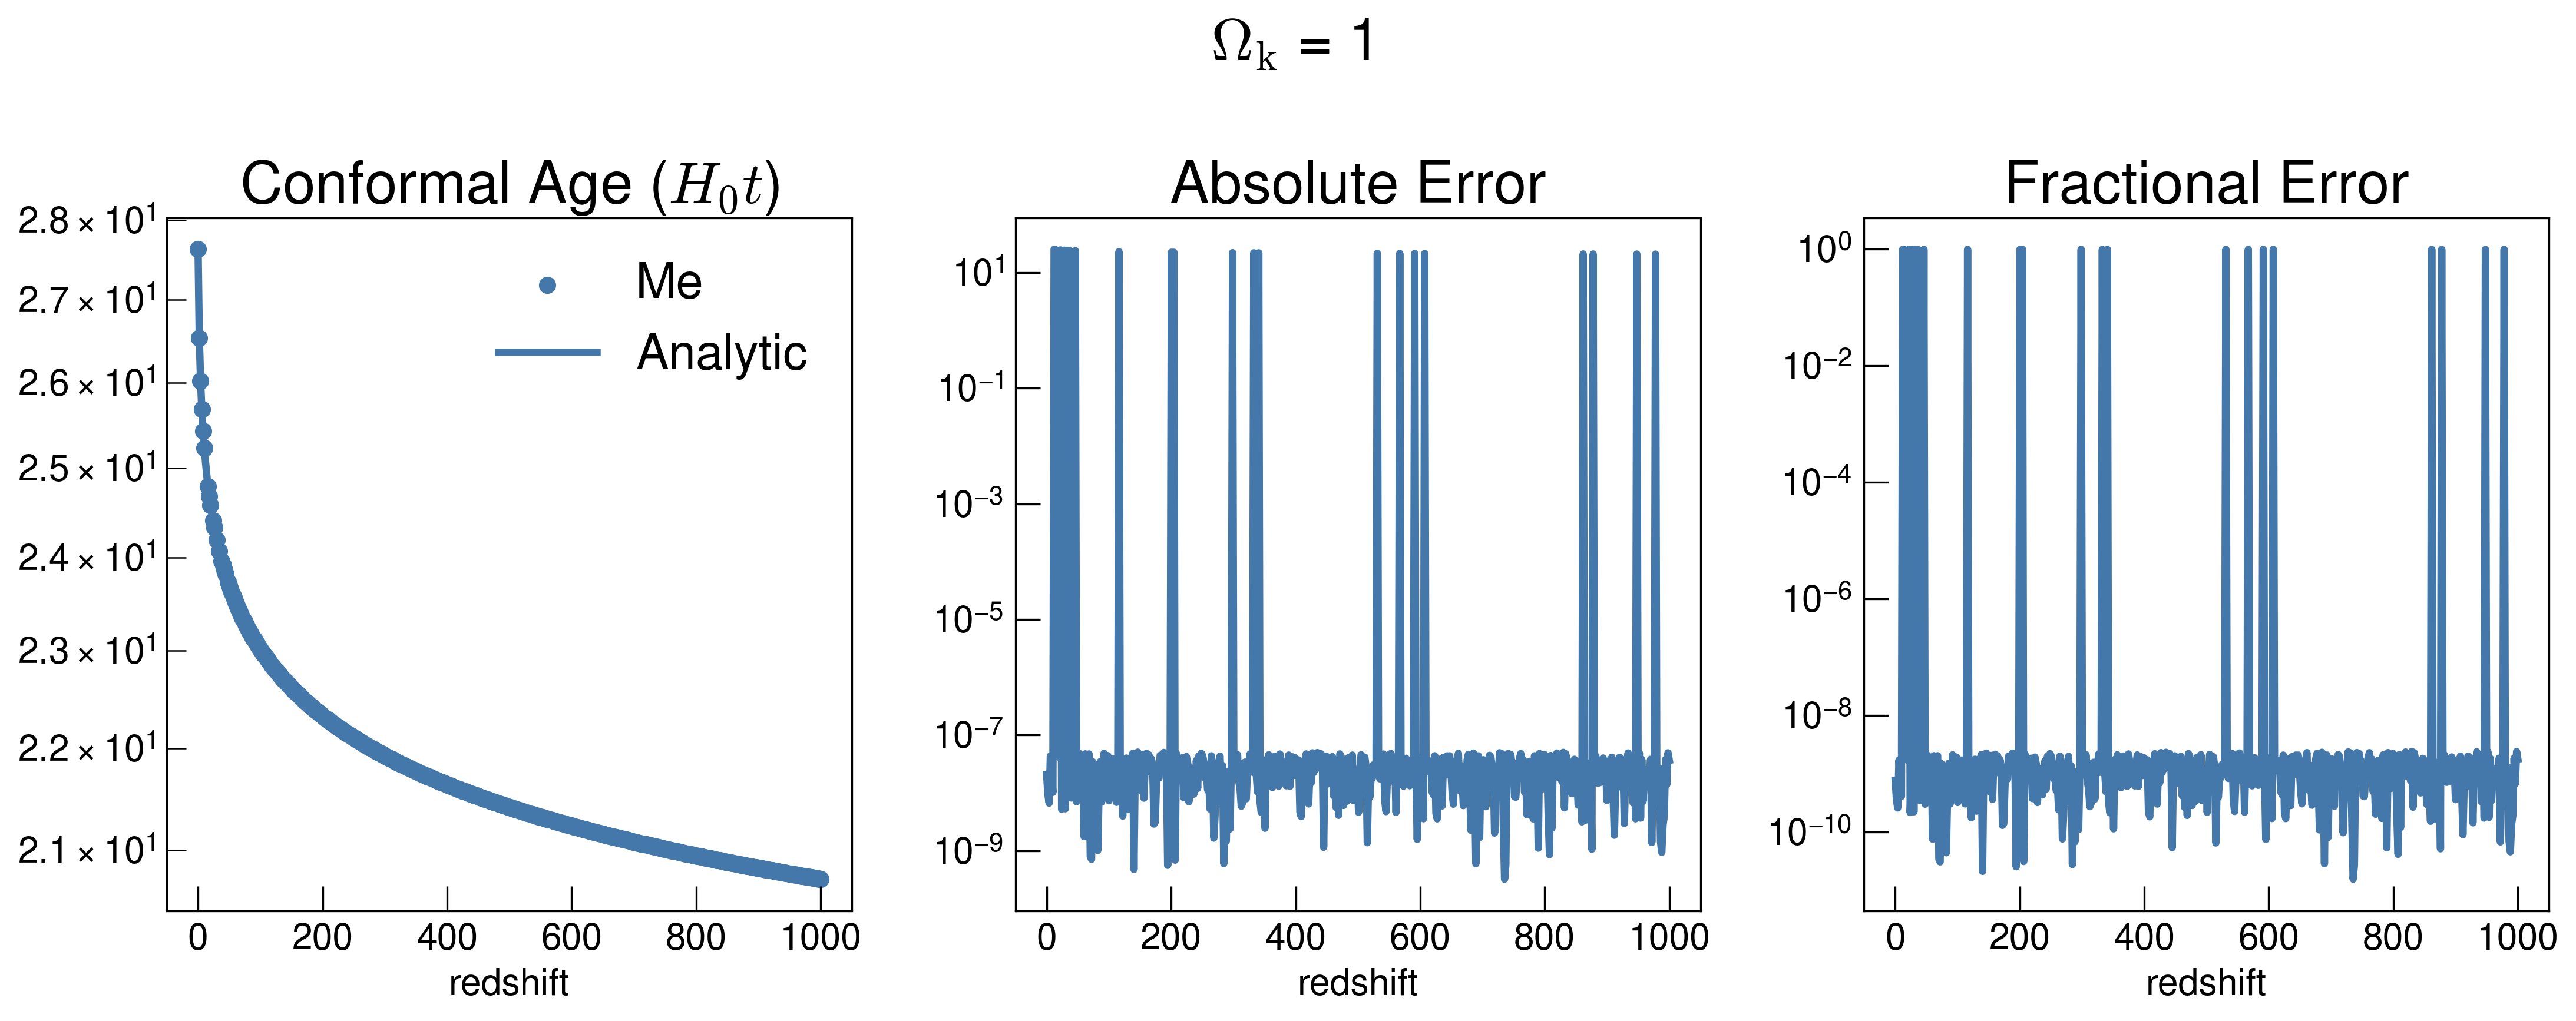

In [32]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(curvature_cosmo.z_arr, curvature_cosmo.time_confage, label='Me')
ax[0].plot(curvature_cosmo.z_arr, conf_age_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Conformal Age ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(curvature_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(curvature_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\rm{k}}$ = 1")

fig.tight_layout()

In [33]:
conf_analytic = curvature_cosmo.conformal_analytical(curvature_cosmo.z_arr)
abs_err = np.abs(curvature_cosmo.time_conf - conf_analytic)
frac_err = abs_err/conf_analytic

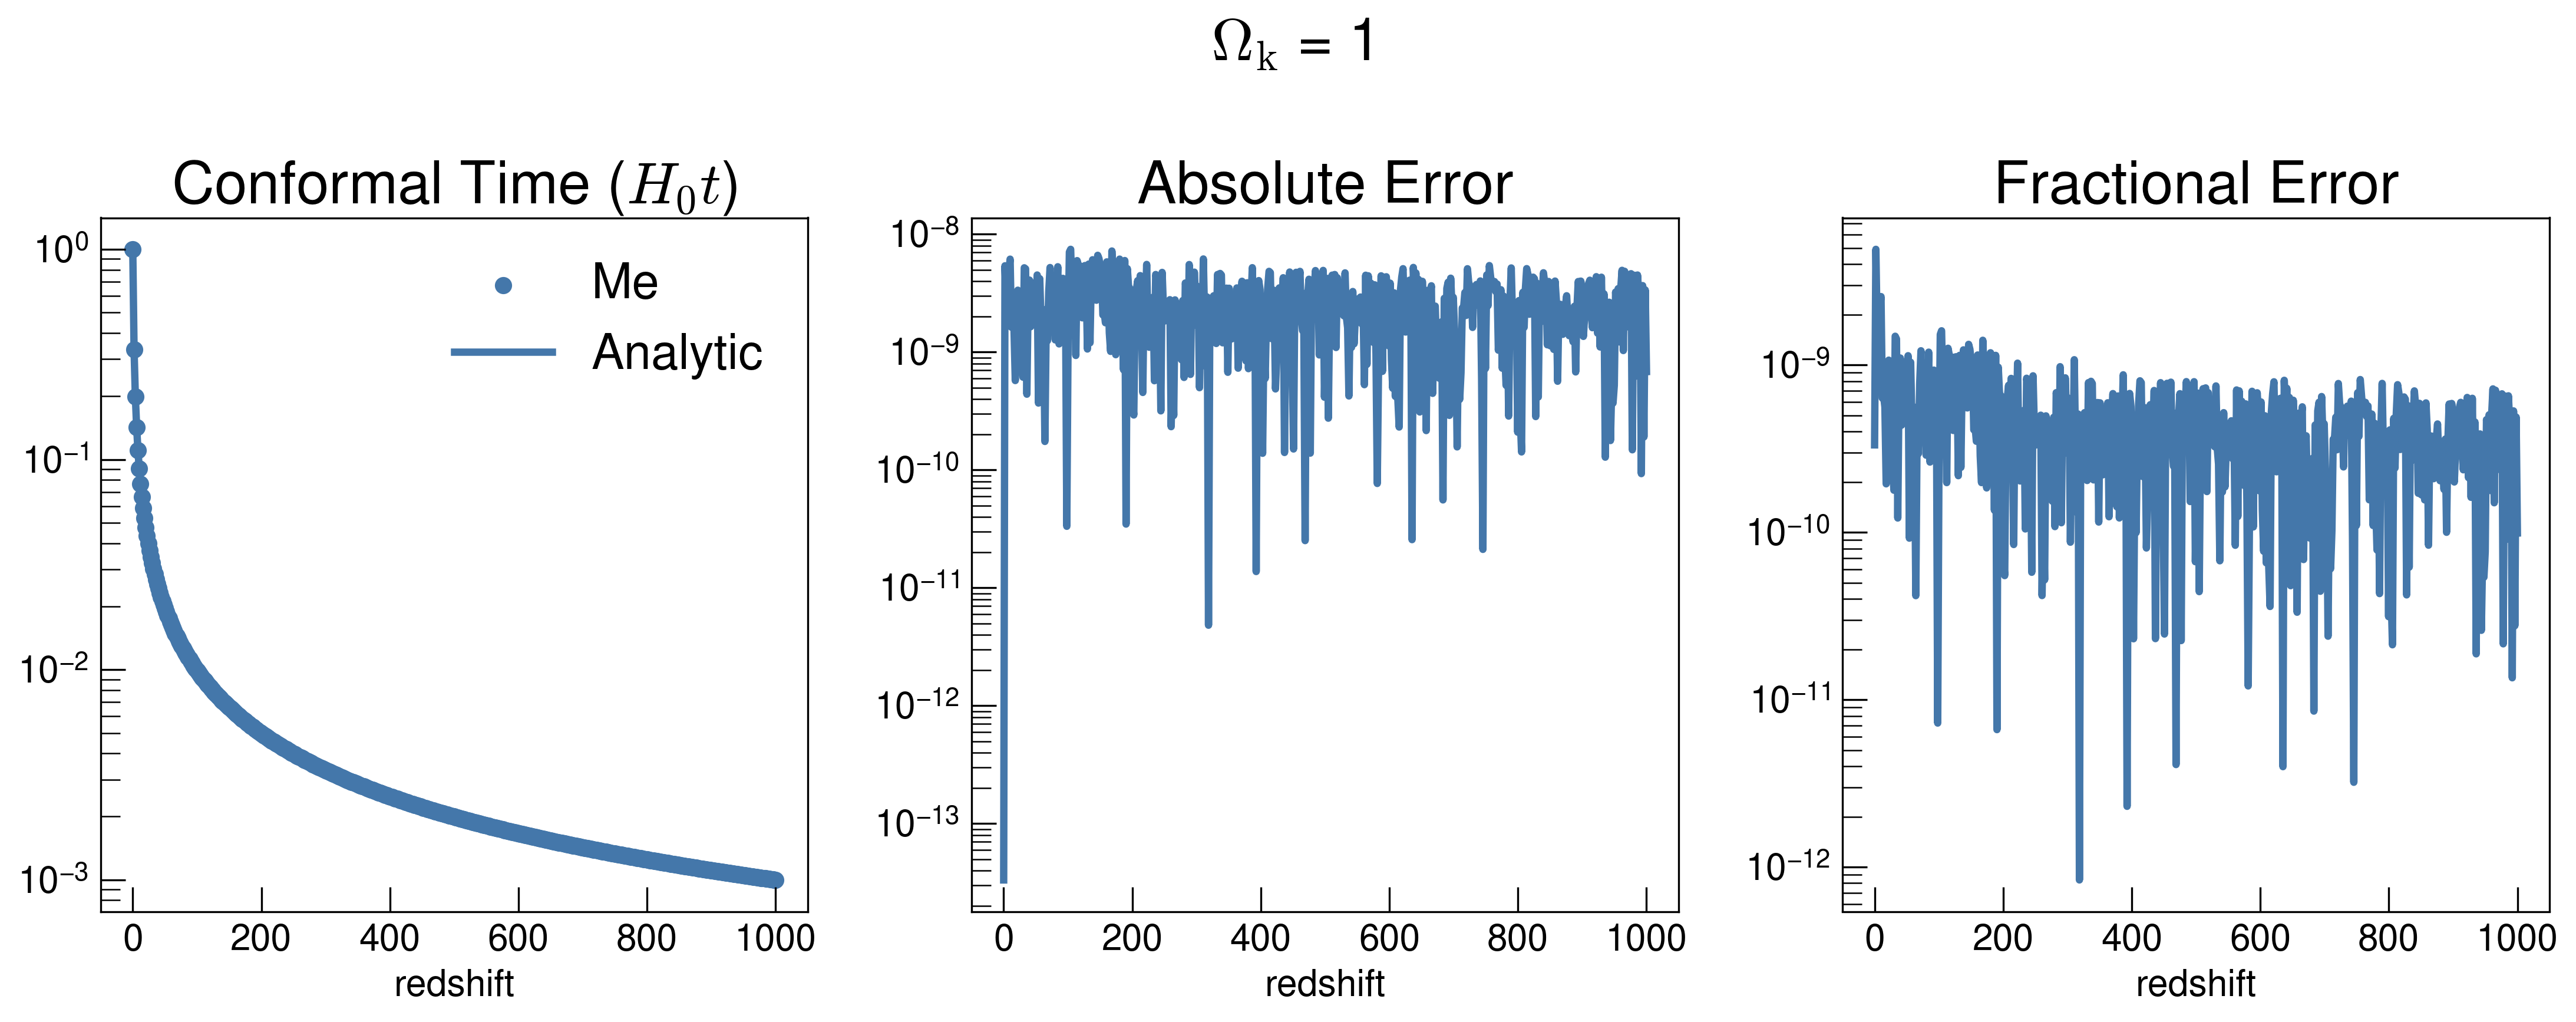

In [34]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(curvature_cosmo.z_arr, curvature_cosmo.time_age, label='Me')
ax[0].plot(curvature_cosmo.z_arr, age_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Conformal Time ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(curvature_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(curvature_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\rm{k}}$ = 1")

fig.tight_layout()

## Vacuum Dominated Universe

$$
\xi(z) = \sqrt{\Omega_{k}(1 + z)^{2} + \Omega_{\textrm{m}}(1 + z)^{3} + \Omega_{\textrm{R}}(1 + z)^{4} + \Omega_{\Lambda}} \rightarrow \xi(z) = \sqrt{\Omega_{\textrm{k}}}
$$

$$
\chi_{\textrm{conf}}(z) H_0 = \int_{0}^{z} \frac{1}{\xi(z')} \textrm{d}z' = \int_{0}^{z} \frac{1}{\sqrt{\Omega_{\Lambda}}} \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\Lambda}}} \int_{0}^{z} \textrm{d}z'
$$

$$
\chi_{\textrm{conf}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\Lambda}}} (z') \Bigr|_{0}^{z} = \frac{1}{\sqrt{\Omega_{\Lambda}}} \left(z - 0 \right)
$$

$$
\chi_{\textrm{conf}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\Lambda}}} z
$$

$$
\chi_{\textrm{age}}(z) H_0 = \int_{z}^{z_{\infty}} \frac{1}{\xi(z')} \textrm{d}z' = \int_{z}^{z_{\infty}} \frac{1}{\sqrt{\Omega_{\Lambda}}} \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\Lambda}}} \int_{z}^{z_{\infty}} \textrm{d}z'
$$

$$
\chi_{\textrm{age}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\Lambda}}} (z') \Bigr|_{z}^{z_{\infty}}
$$

$$
\chi_{\textrm{age}}(z) H_0 =  \frac{1}{\sqrt{\Omega_{\Lambda}}}  \left(z_{\infty} - z \right)
$$

$$
t_{\textrm{age}}(z) H_0 = \int_{z}^{z_{\infty}} \frac{1}{(1+z')\xi(z')} \textrm{d}z' = \int_{z}^{z_{\infty}} \frac{1}{(1+z') \sqrt{\Omega_{\Lambda}}} \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\Lambda}}} \int_{z}^{z_{\infty}} (1 + z')^{-1} \textrm{d}z'
$$

$$
t_{\textrm{age}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\Lambda}}} \ln (1+z') \Bigr|_{z}^{z_{\infty}}
$$

$$
t_{\textrm{age}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\Lambda}}}  \bigl( \ln(1 + z_{\infty}) - \ln(1 + z) \bigr)
$$

$$
t_{\textrm{look}}(z) H_0 = \int_{0}^{z} \frac{1}{(1+z')\xi(z')} \textrm{d}z' = \int_{0}^{z} \frac{1}{(1+z') \sqrt{\Omega_{\Lambda}} } \textrm{d}z' = \frac{1}{\sqrt{\Omega_{\Lambda}}} \int_{0}^{z} (1 + z')^{-1} \textrm{d}z'
$$

$$
t_{\textrm{look}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\Lambda}}} \ln(1+z') \Bigr|_{0}^{z}
$$

$$
t_{\textrm{look}}(z) H_0 = \frac{1}{\sqrt{\Omega_{\Lambda}}}  \ln (1 + z)
$$

In [35]:
class FlatLambdaCosmology:
    
    def __init__(self, table_lambda_fname):
        self.fname = table_lambda_fname
        self.set_arrs()
        
    def set_arrs(self):
        '''
        Place attributes of the redshift, lookback, age, conformal time, conformal age
        
        Assumes table is saved with values at cols: 0,3,4,5,6
        '''
        table = np.loadtxt(self.fname, skiprows=10, delimiter = ',')

        self.z_arr = table[:,0]

        self.time_look = table[:,3]
        self.time_look_Gyr = self.time_look / H0_cgs / GYRS_CGS
        
        self.time_age = table[:,4]
        self.time_age_Gyr = self.time_age / H0_cgs / GYRS_CGS

        self.time_conf = table[:,5]
        self.time_conf_Gyr = self.time_conf / H0_cgs / GYRS_CGS
        
        self.time_confage = table[:,6]
        self.time_confage_Gyr = self.time_confage / H0_cgs / GYRS_CGS

        
    def conformal_analytical(self, z):
        '''
        Analytically calculate the conformal time to a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return z
    
    
    def conformal_age_analytical(self, z):
        '''
        Analytically calculate the conformal age at a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return z_infty - z
        
    
    def lookback_analytical(self, z):
        '''
        Analytically calculate the lookback time to a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return np.log(1. + z)

    
    def age_analytical(self, z):
        '''
        Analytically calculate the age at a redshift for matter-dominated Universe
        
        Returned in units of H0
        '''
        
        return np.log(1. + z_infty) - np.log(1. + z)

In [36]:
lambda_cosmo = FlatLambdaCosmology(table_Lambda_fname)

In [37]:
lookback_analytic = lambda_cosmo.lookback_analytical(lambda_cosmo.z_arr)
abs_err = np.abs(lambda_cosmo.time_look - lookback_analytic)
frac_err = abs_err/lookback_analytic

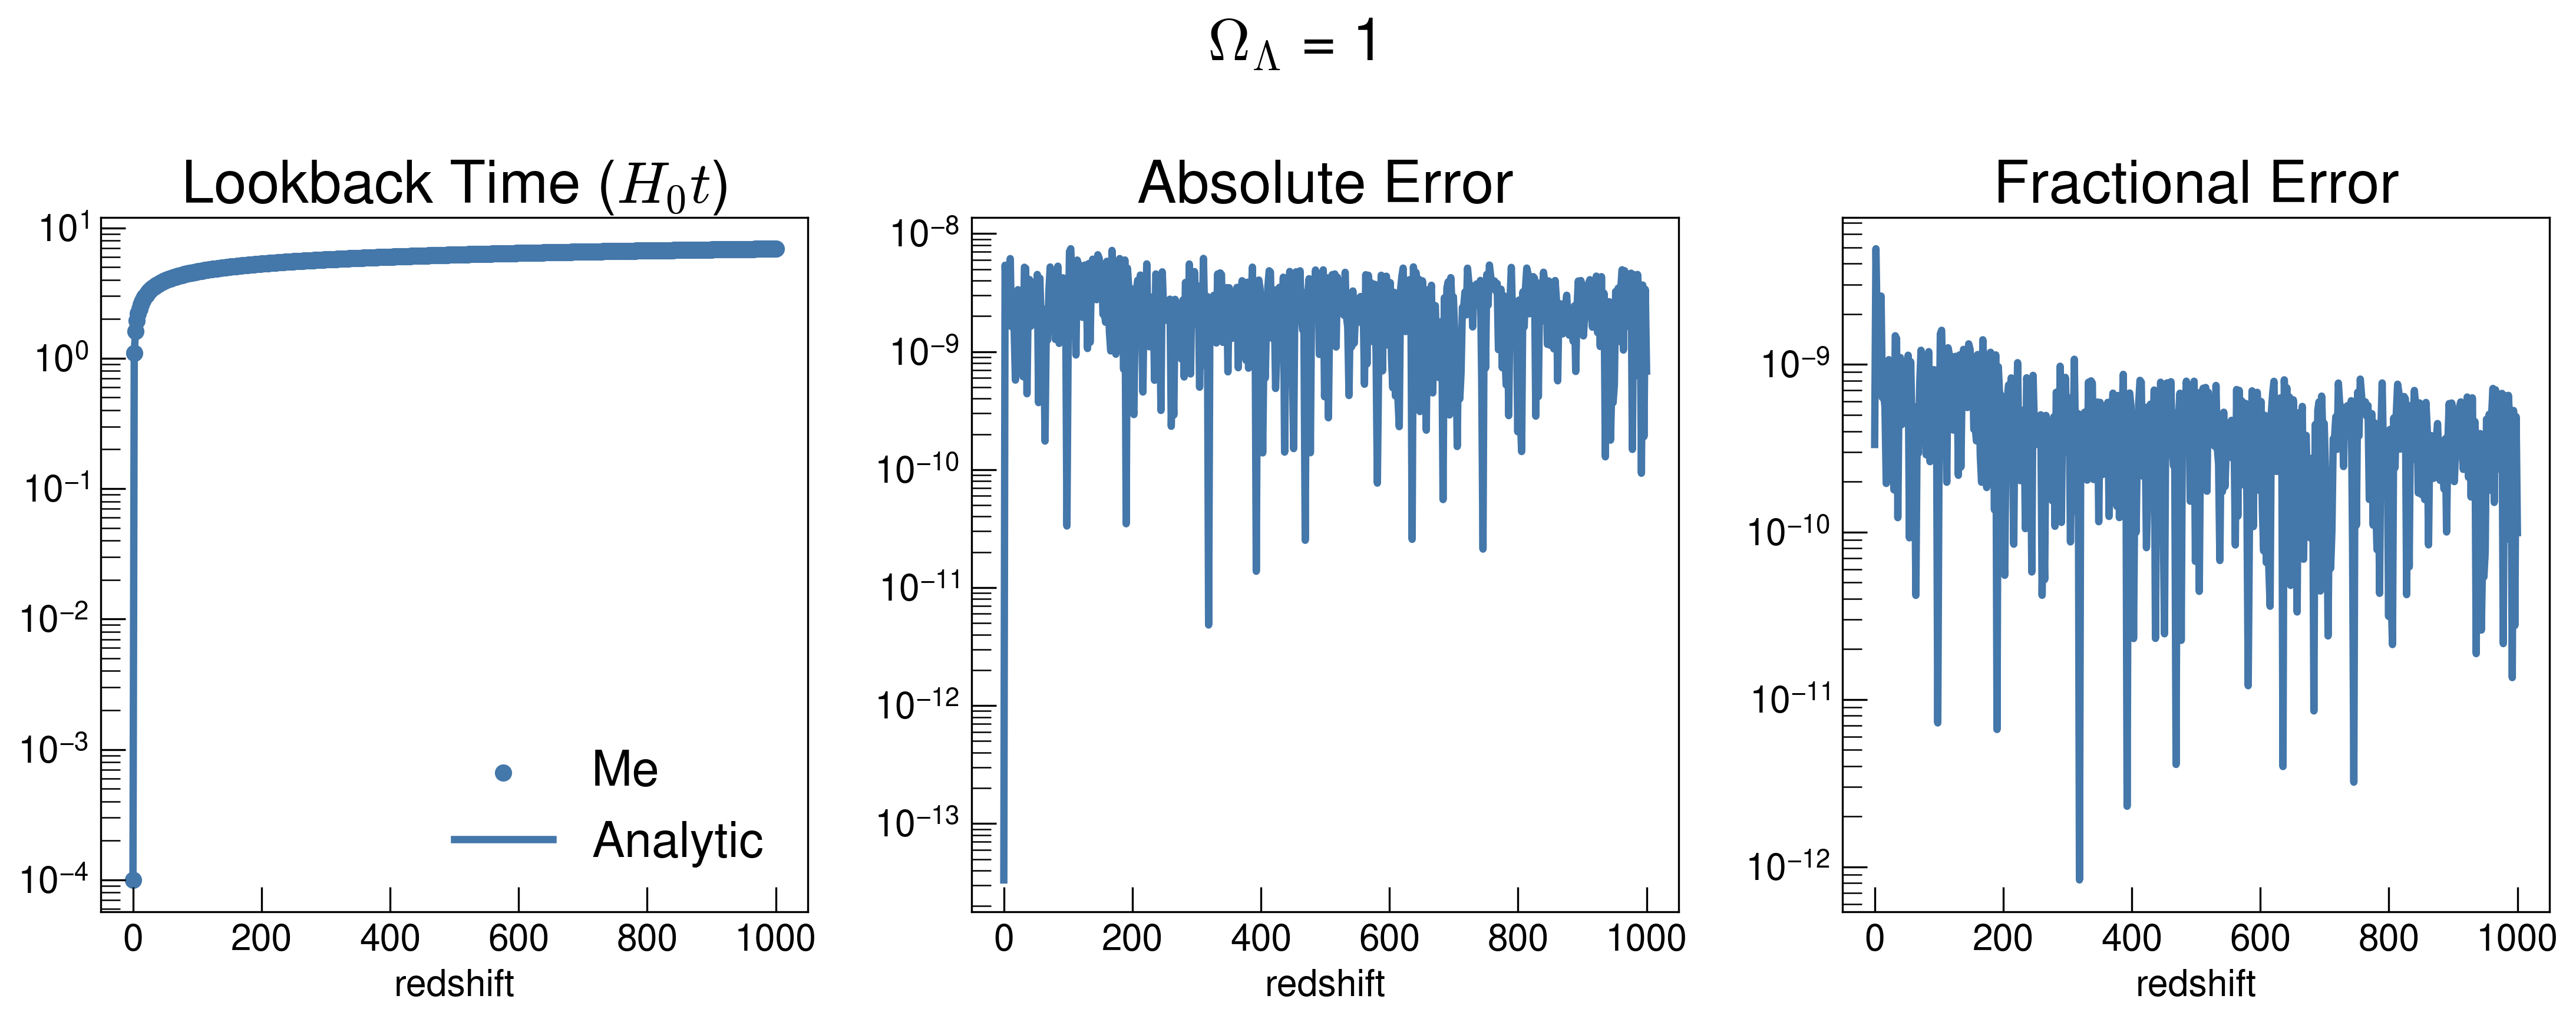

In [38]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(lambda_cosmo.z_arr, lambda_cosmo.time_look, label='Me')
ax[0].plot(lambda_cosmo.z_arr, lookback_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Lookback Time ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(lambda_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(lambda_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\Lambda}$ = 1")

fig.tight_layout()

In [39]:
age_analytic = lambda_cosmo.age_analytical(lambda_cosmo.z_arr)
abs_err = np.abs(lambda_cosmo.time_age - age_analytic)
frac_err = abs_err/age_analytic

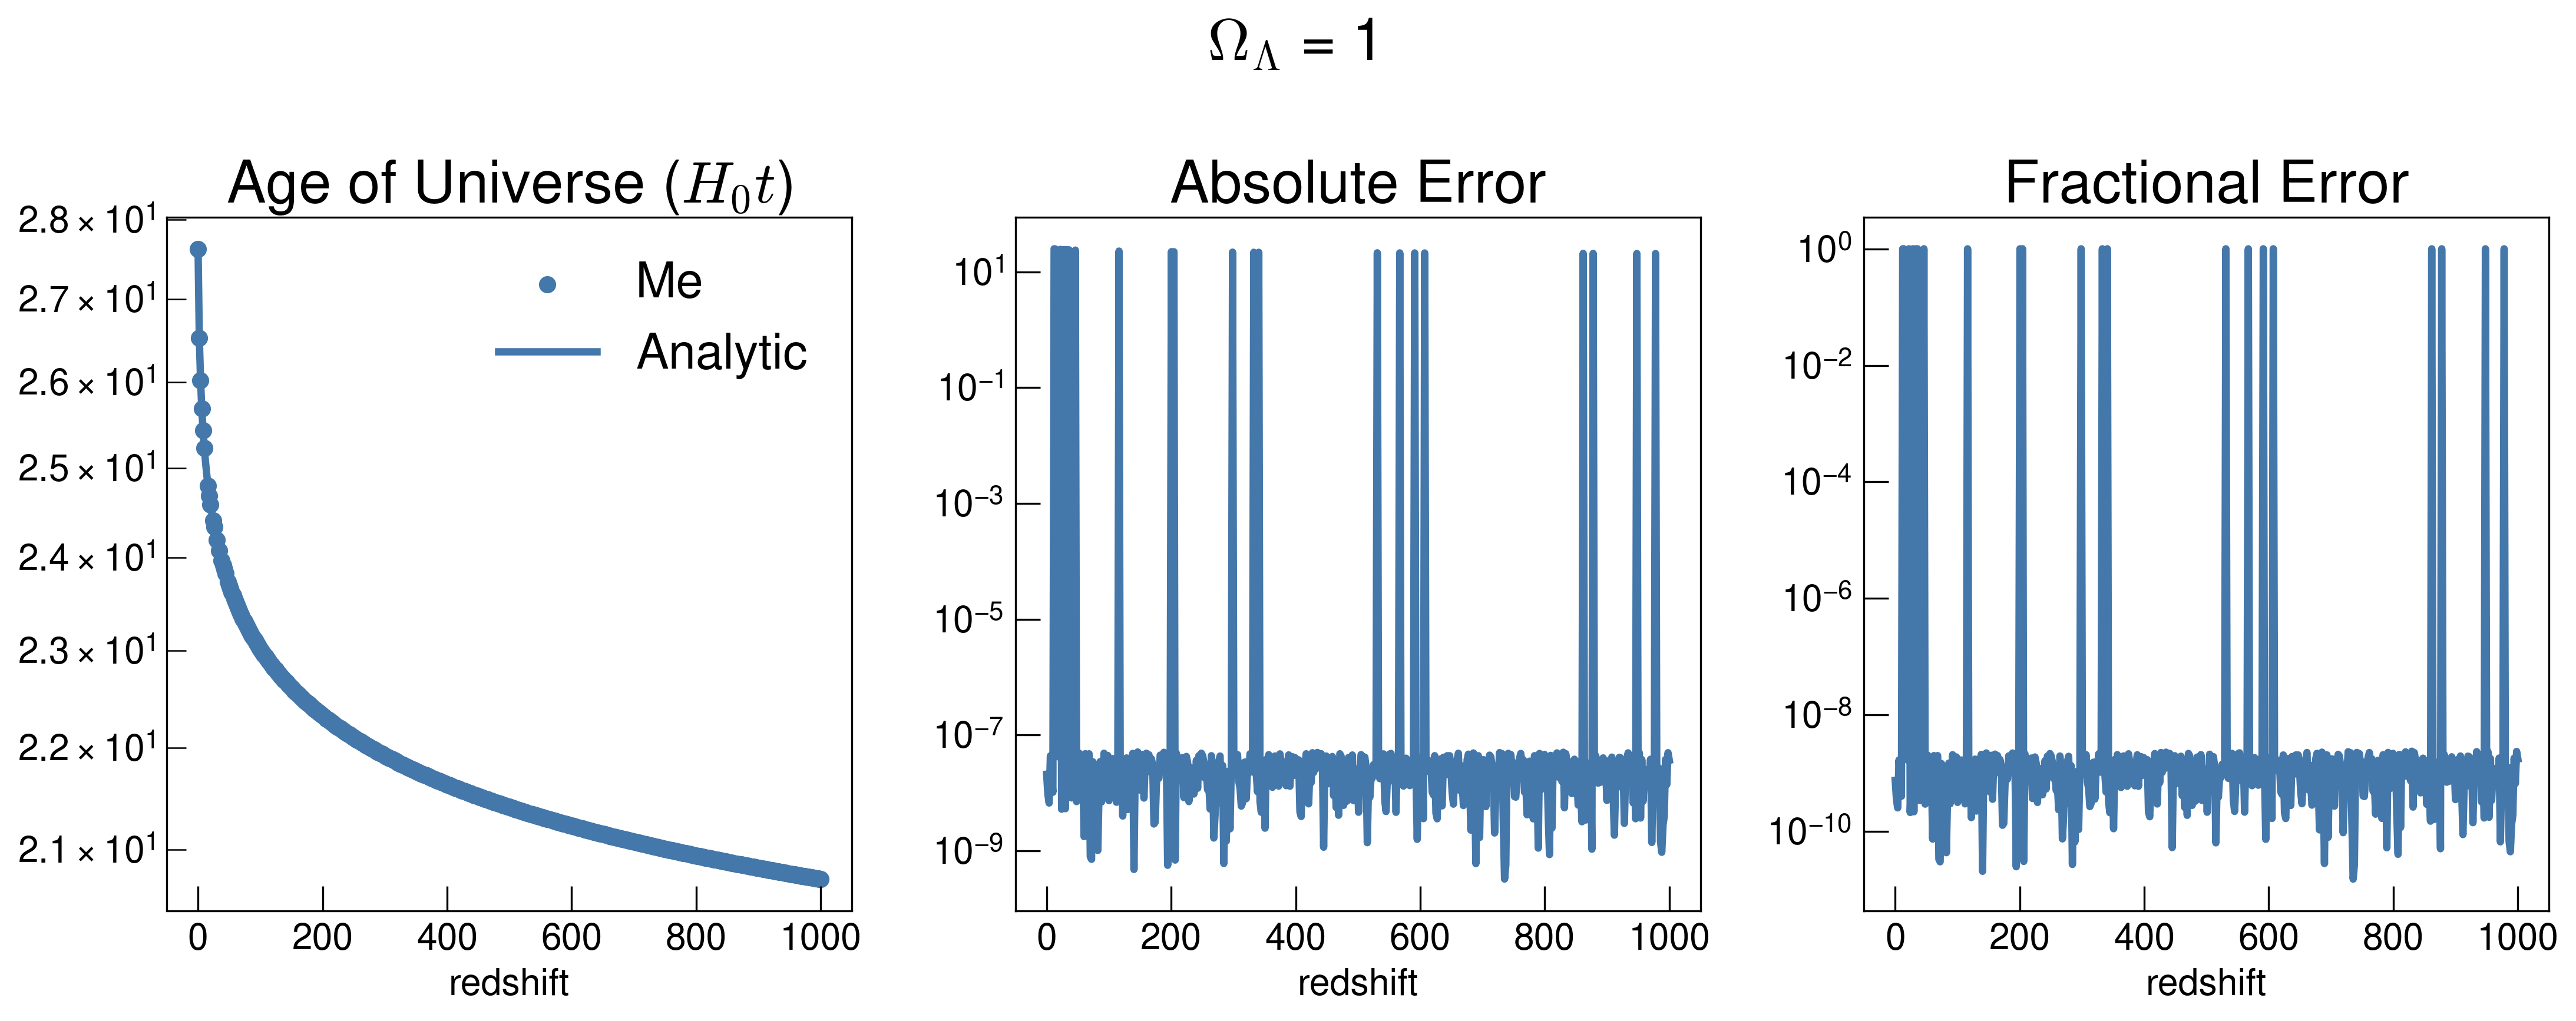

In [40]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(lambda_cosmo.z_arr, lambda_cosmo.time_age, label='Me')
ax[0].plot(lambda_cosmo.z_arr, age_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Age of Universe ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(lambda_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(lambda_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\Lambda}$ = 1")

fig.tight_layout()

In [41]:
conf_age_analytic = lambda_cosmo.conformal_age_analytical(lambda_cosmo.z_arr)
abs_err = np.abs(lambda_cosmo.time_confage - conf_age_analytic)
frac_err = abs_err/conf_age_analytic

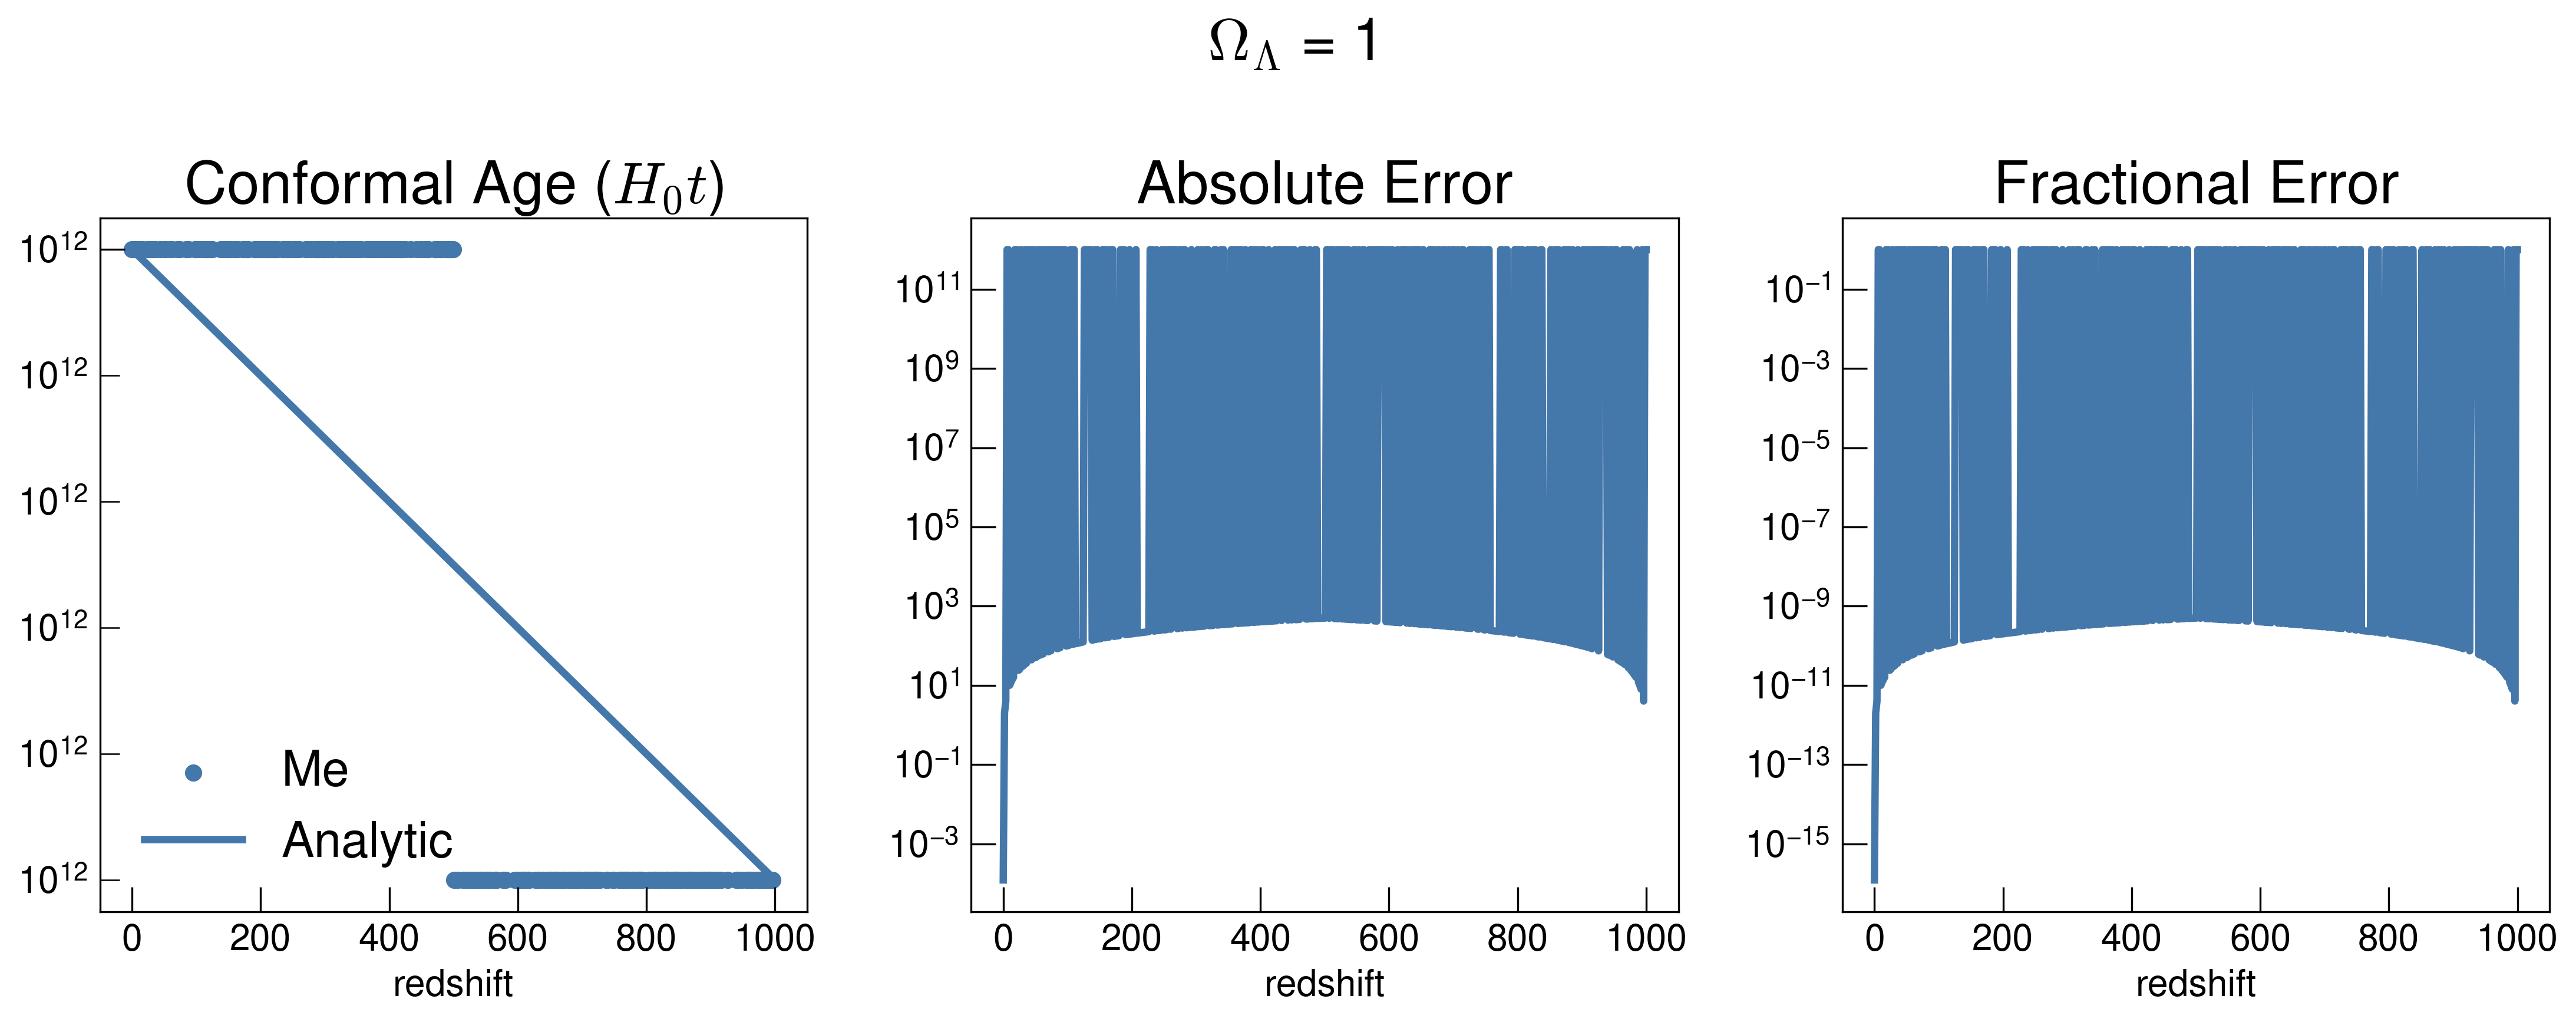

In [42]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(lambda_cosmo.z_arr, lambda_cosmo.time_confage, label='Me')
ax[0].plot(lambda_cosmo.z_arr, conf_age_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Conformal Age ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(lambda_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(lambda_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\Lambda}$ = 1")

fig.tight_layout()

In [43]:
conf_analytic = lambda_cosmo.conformal_analytical(lambda_cosmo.z_arr)
abs_err = np.abs(lambda_cosmo.time_conf - conf_analytic)
frac_err = abs_err/conf_analytic

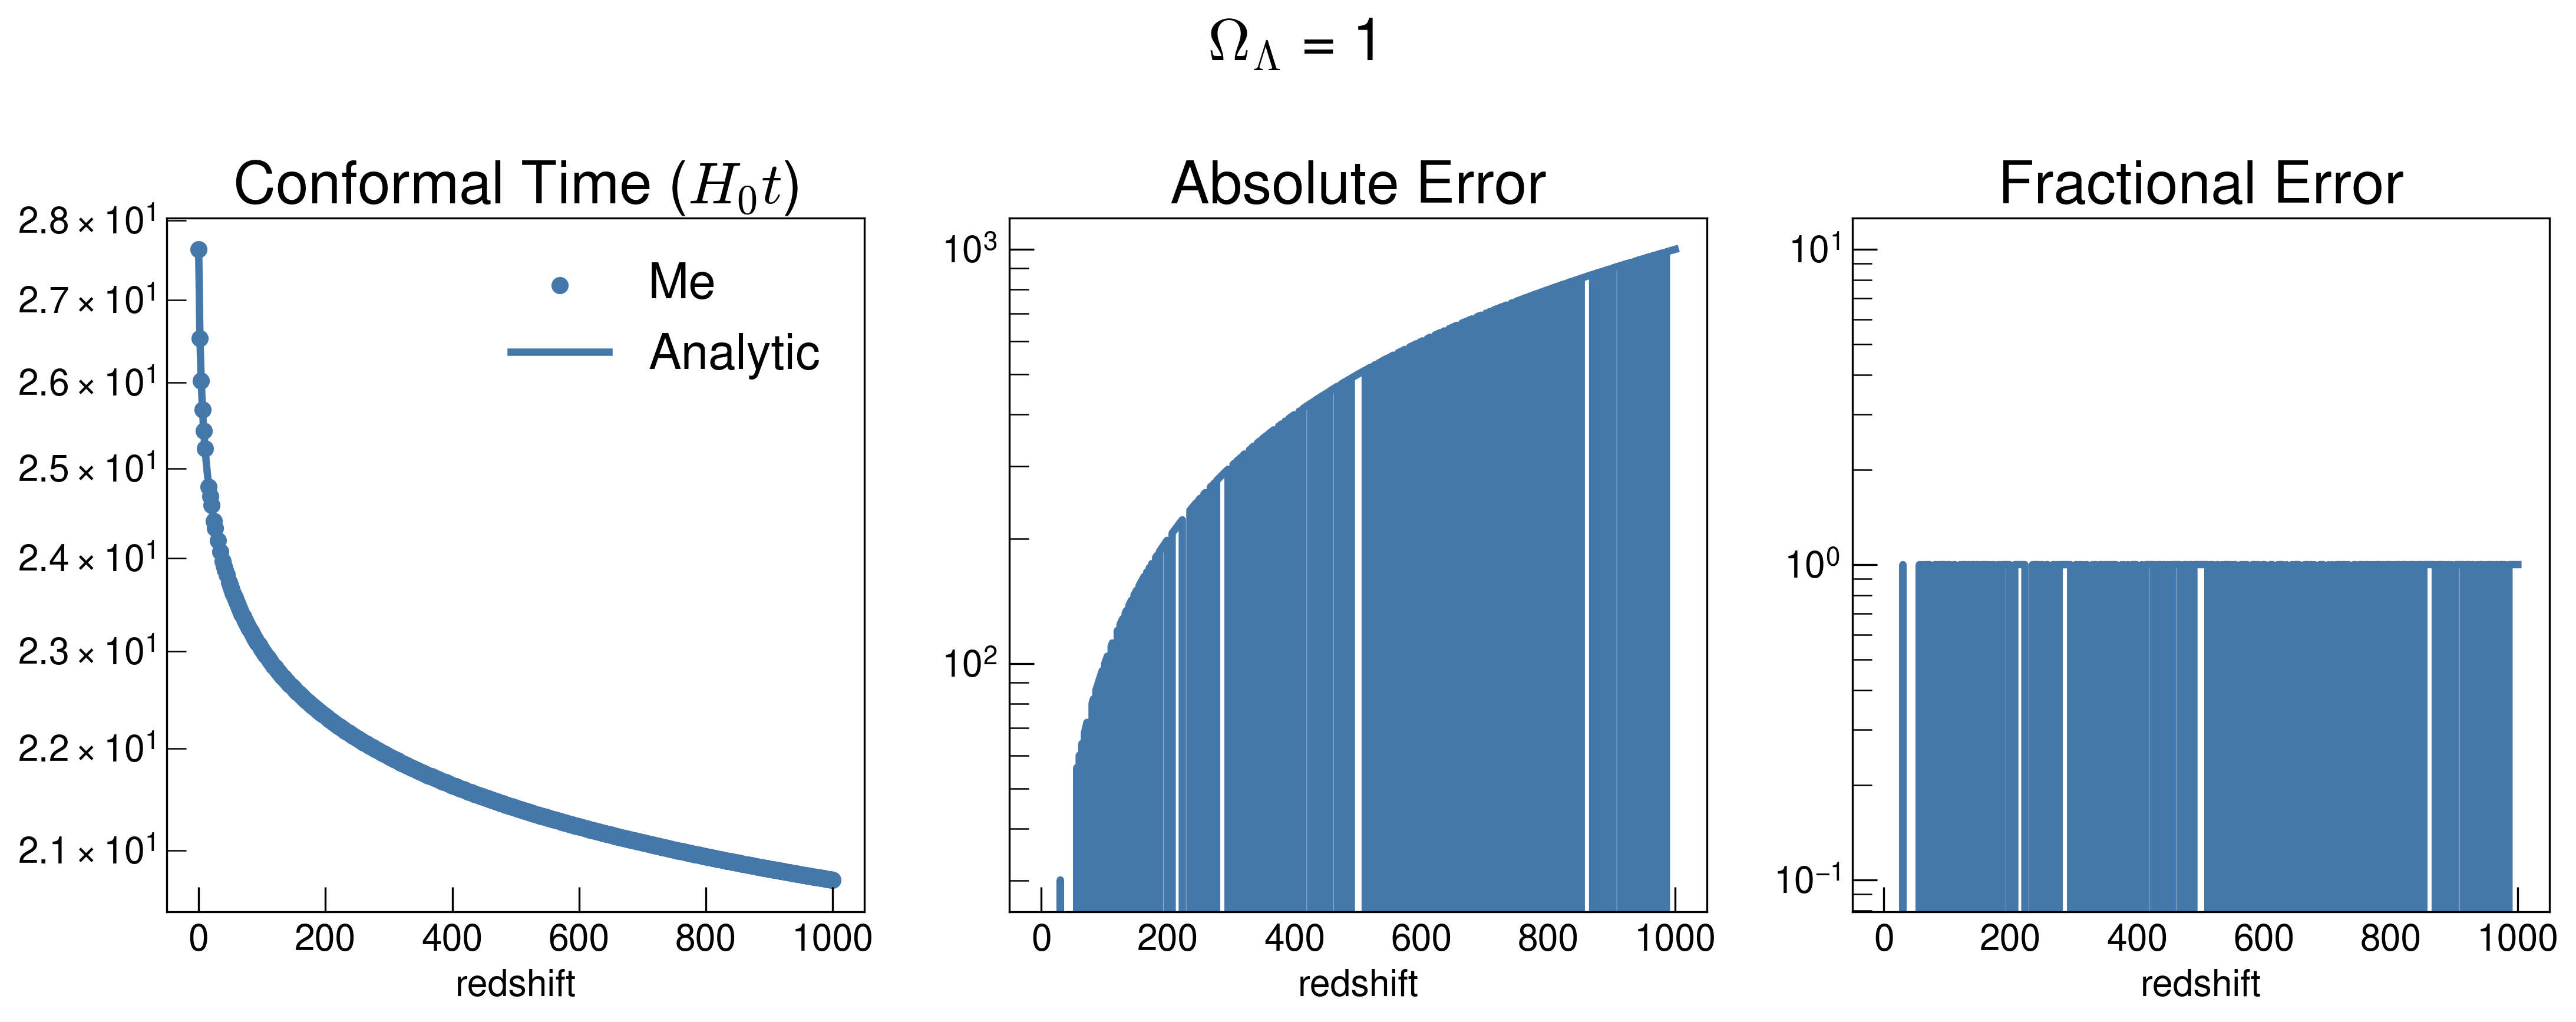

In [44]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=3)

ax[0].scatter(lambda_cosmo.z_arr, lambda_cosmo.time_age, label='Me')
ax[0].plot(lambda_cosmo.z_arr, age_analytic, label='Analytic')
ax[0].set_yscale('log')
ax[0].set_title(r"Conformal Time ($H_0 t$)")
ax[0].set_xlabel('redshift')
ax[0].legend()


ax[1].plot(lambda_cosmo.z_arr, abs_err)
ax[1].set_yscale('log')
ax[1].set_xlabel('redshift')
ax[1].set_title("Absolute Error")


ax[2].plot(lambda_cosmo.z_arr, frac_err)
ax[2].set_yscale('log')
ax[2].set_xlabel('redshift')
ax[2].set_title("Fractional Error")

fig.suptitle(r"$\Omega_{\Lambda}$ = 1")

fig.tight_layout()

My calculator is currently not well optimized to integrate a constant

## Cosmology Comparison

We can compare quantites between the different cosmologies

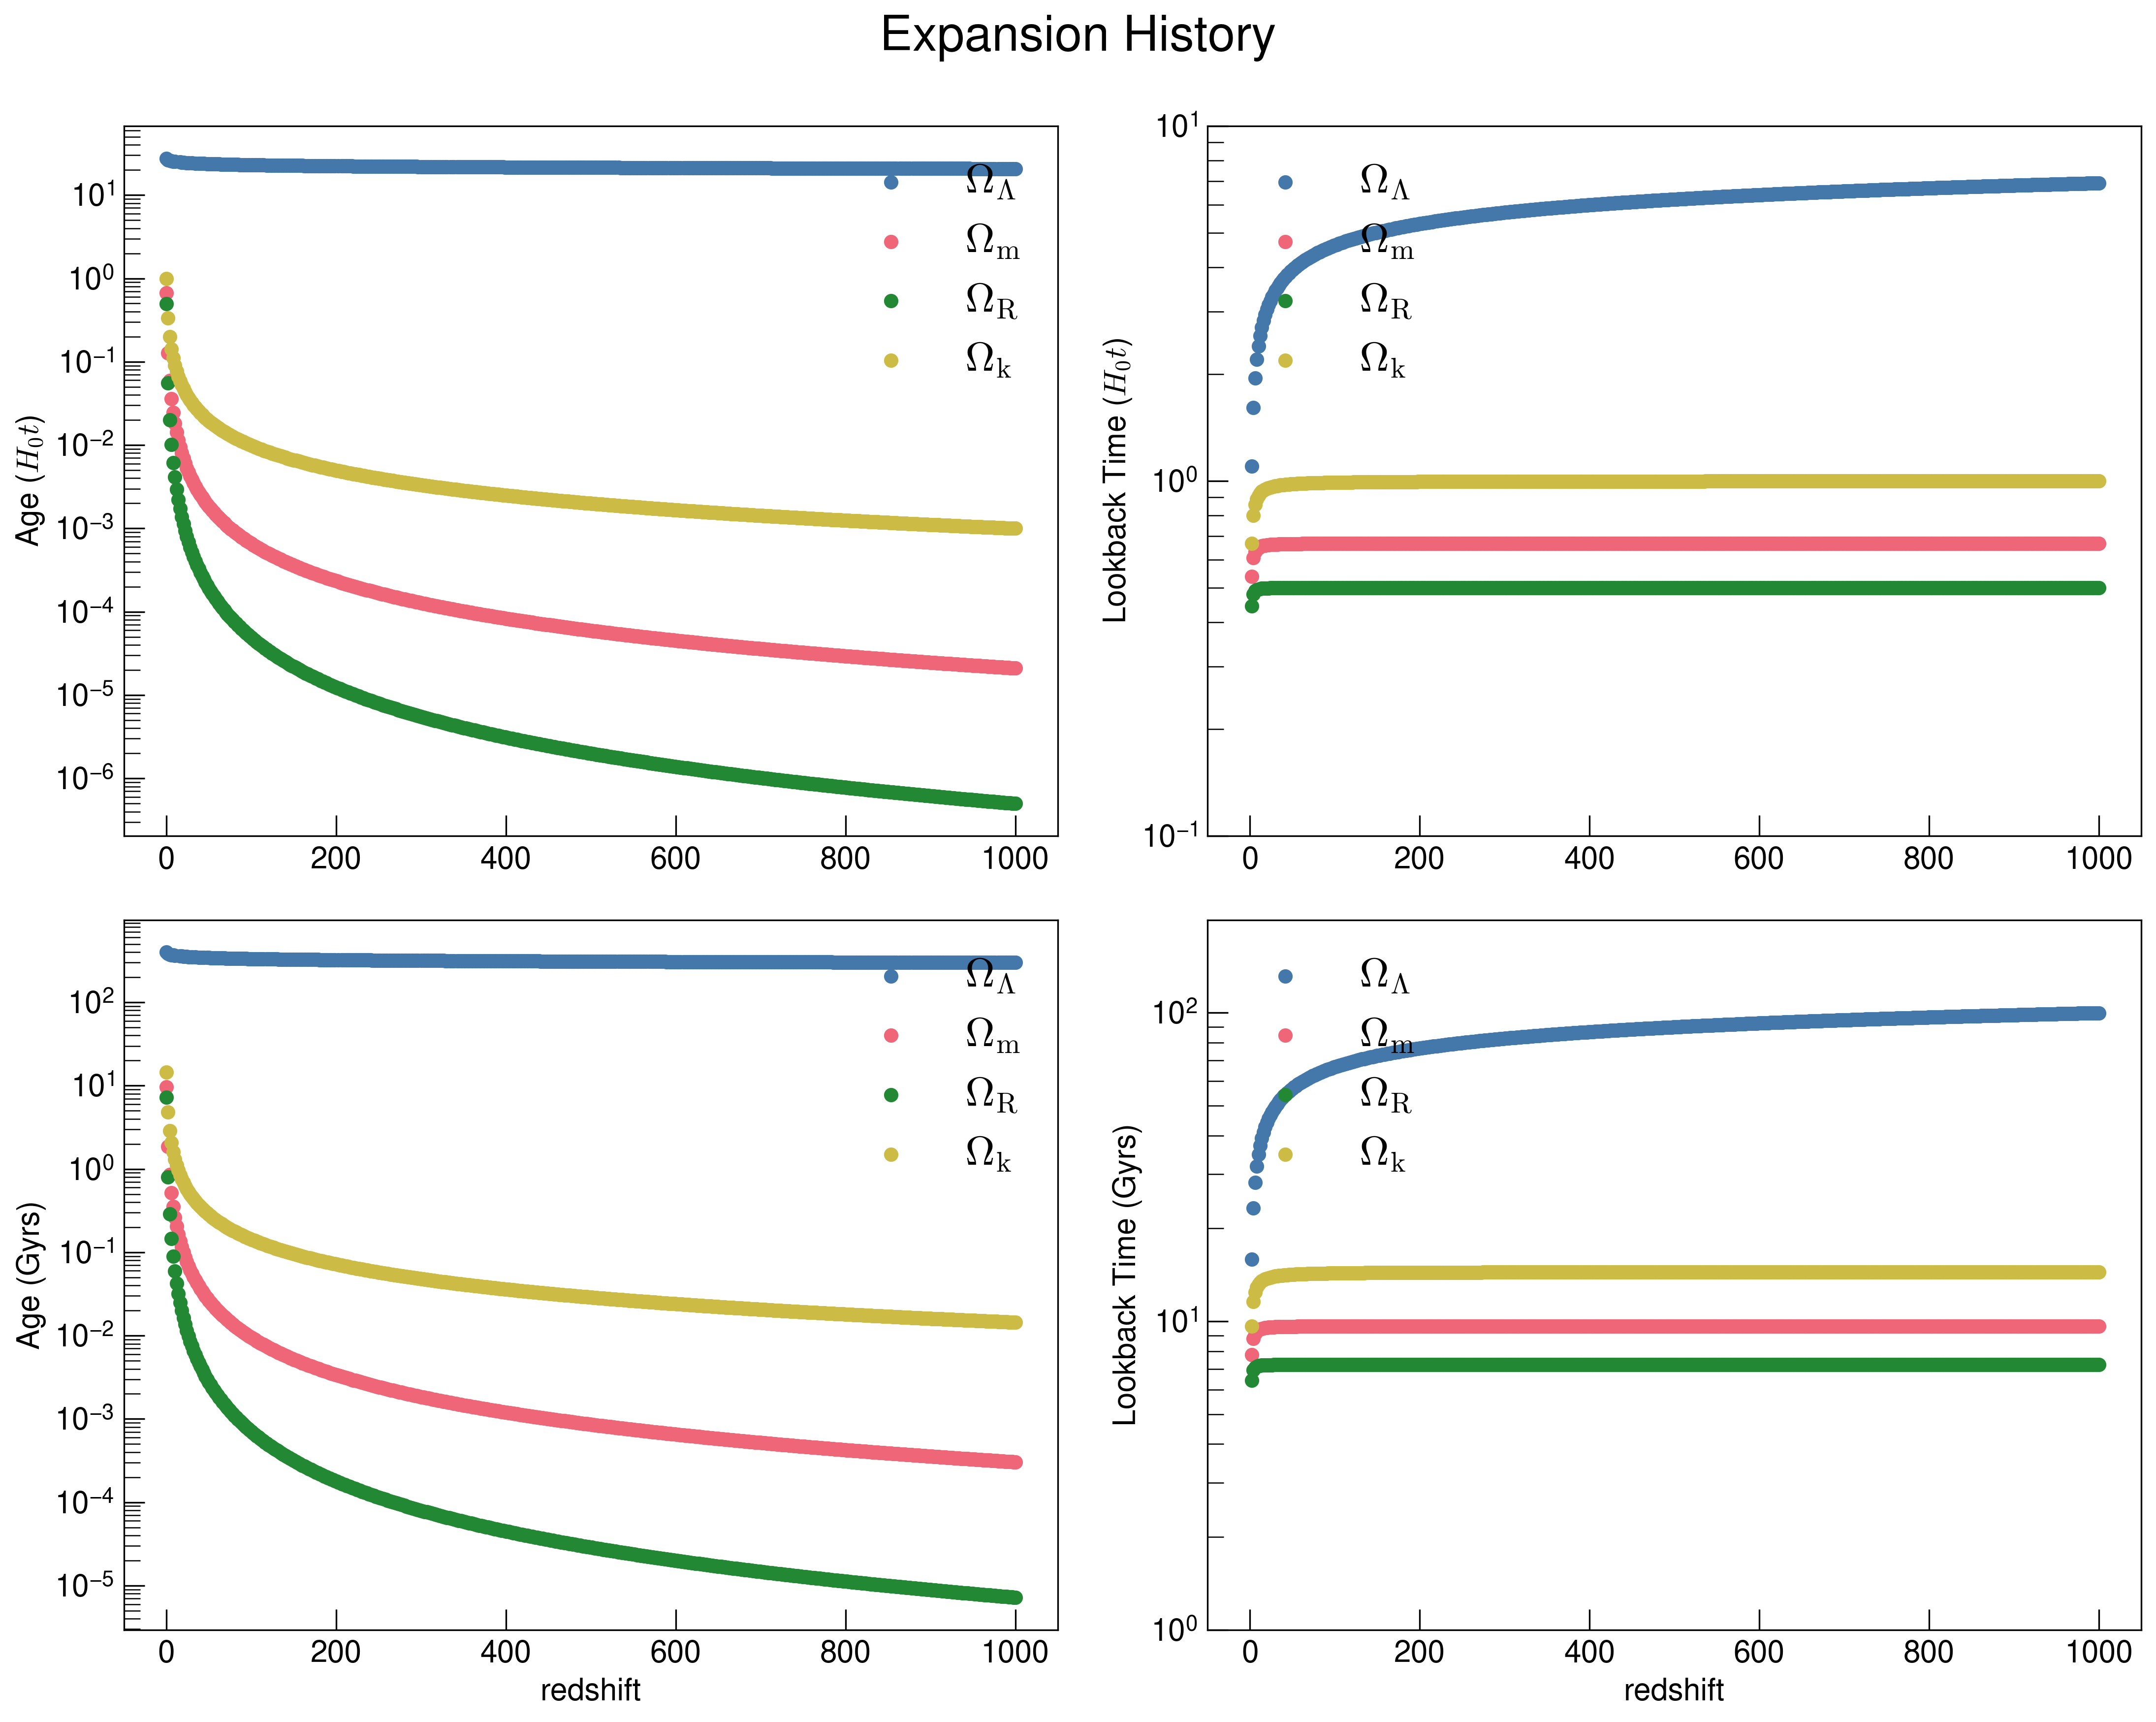

In [45]:
fig, ax = plt.subplots(figsize=(15,12), nrows=2, ncols=2)

ax[0,0].scatter(lambda_cosmo.z_arr, lambda_cosmo.time_age, label=r'$\Omega_{\Lambda}$')
ax[0,0].scatter(matter_cosmo.z_arr, matter_cosmo.time_age, label=r'$\Omega_{\rm{m}}$')
ax[0,0].scatter(radiation_cosmo.z_arr, radiation_cosmo.time_age, label=r'$\Omega_{\rm{R}}$')
ax[0,0].scatter(curvature_cosmo.z_arr, curvature_cosmo.time_age, label=r'$\Omega_{\rm{k}}$')
ax[0,0].set_yscale('log')
ax[0,0].set_ylabel(r"Age ($H_0 t$)")
ax[0,0].legend()


ax[0,1].scatter(lambda_cosmo.z_arr, lambda_cosmo.time_look, label=r'$\Omega_{\Lambda}$')
ax[0,1].scatter(matter_cosmo.z_arr, matter_cosmo.time_look, label=r'$\Omega_{\rm{m}}$')
ax[0,1].scatter(radiation_cosmo.z_arr, radiation_cosmo.time_look, label=r'$\Omega_{\rm{R}}$')
ax[0,1].scatter(curvature_cosmo.z_arr, curvature_cosmo.time_look, label=r'$\Omega_{\rm{k}}$')
ax[0,1].set_yscale('log')
ax[0,1].set_ylim(1e-1, 1e1)
ax[0,1].set_ylabel(r"Lookback Time ($H_0 t$)")
ax[0,1].legend()


ax[1,0].scatter(lambda_cosmo.z_arr, lambda_cosmo.time_age_Gyr, label=r'$\Omega_{\Lambda}$')
ax[1,0].scatter(matter_cosmo.z_arr, matter_cosmo.time_age_Gyr, label=r'$\Omega_{\rm{m}}$')
ax[1,0].scatter(radiation_cosmo.z_arr, radiation_cosmo.time_age_Gyr, label=r'$\Omega_{\rm{R}}$')
ax[1,0].scatter(curvature_cosmo.z_arr, curvature_cosmo.time_age_Gyr, label=r'$\Omega_{\rm{k}}$')
ax[1,0].set_yscale('log')
ax[1,0].set_ylabel(r"Age (Gyrs)")
ax[1,0].set_xlabel('redshift')
ax[1,0].legend()


ax[1,1].scatter(lambda_cosmo.z_arr, lambda_cosmo.time_look_Gyr, label=r'$\Omega_{\Lambda}$')
ax[1,1].scatter(matter_cosmo.z_arr, matter_cosmo.time_look_Gyr, label=r'$\Omega_{\rm{m}}$')
ax[1,1].scatter(radiation_cosmo.z_arr, radiation_cosmo.time_look_Gyr, label=r'$\Omega_{\rm{R}}$')
ax[1,1].scatter(curvature_cosmo.z_arr, curvature_cosmo.time_look_Gyr, label=r'$\Omega_{\rm{k}}$')
ax[1,1].set_yscale('log')
ax[1,1].set_ylim(1e0, 2e2)
ax[1,1].set_ylabel(r"Lookback Time (Gyrs)")
ax[1,1].set_xlabel('redshift')
ax[1,1].legend()


fig.suptitle(r"Expansion History")

fig.tight_layout()

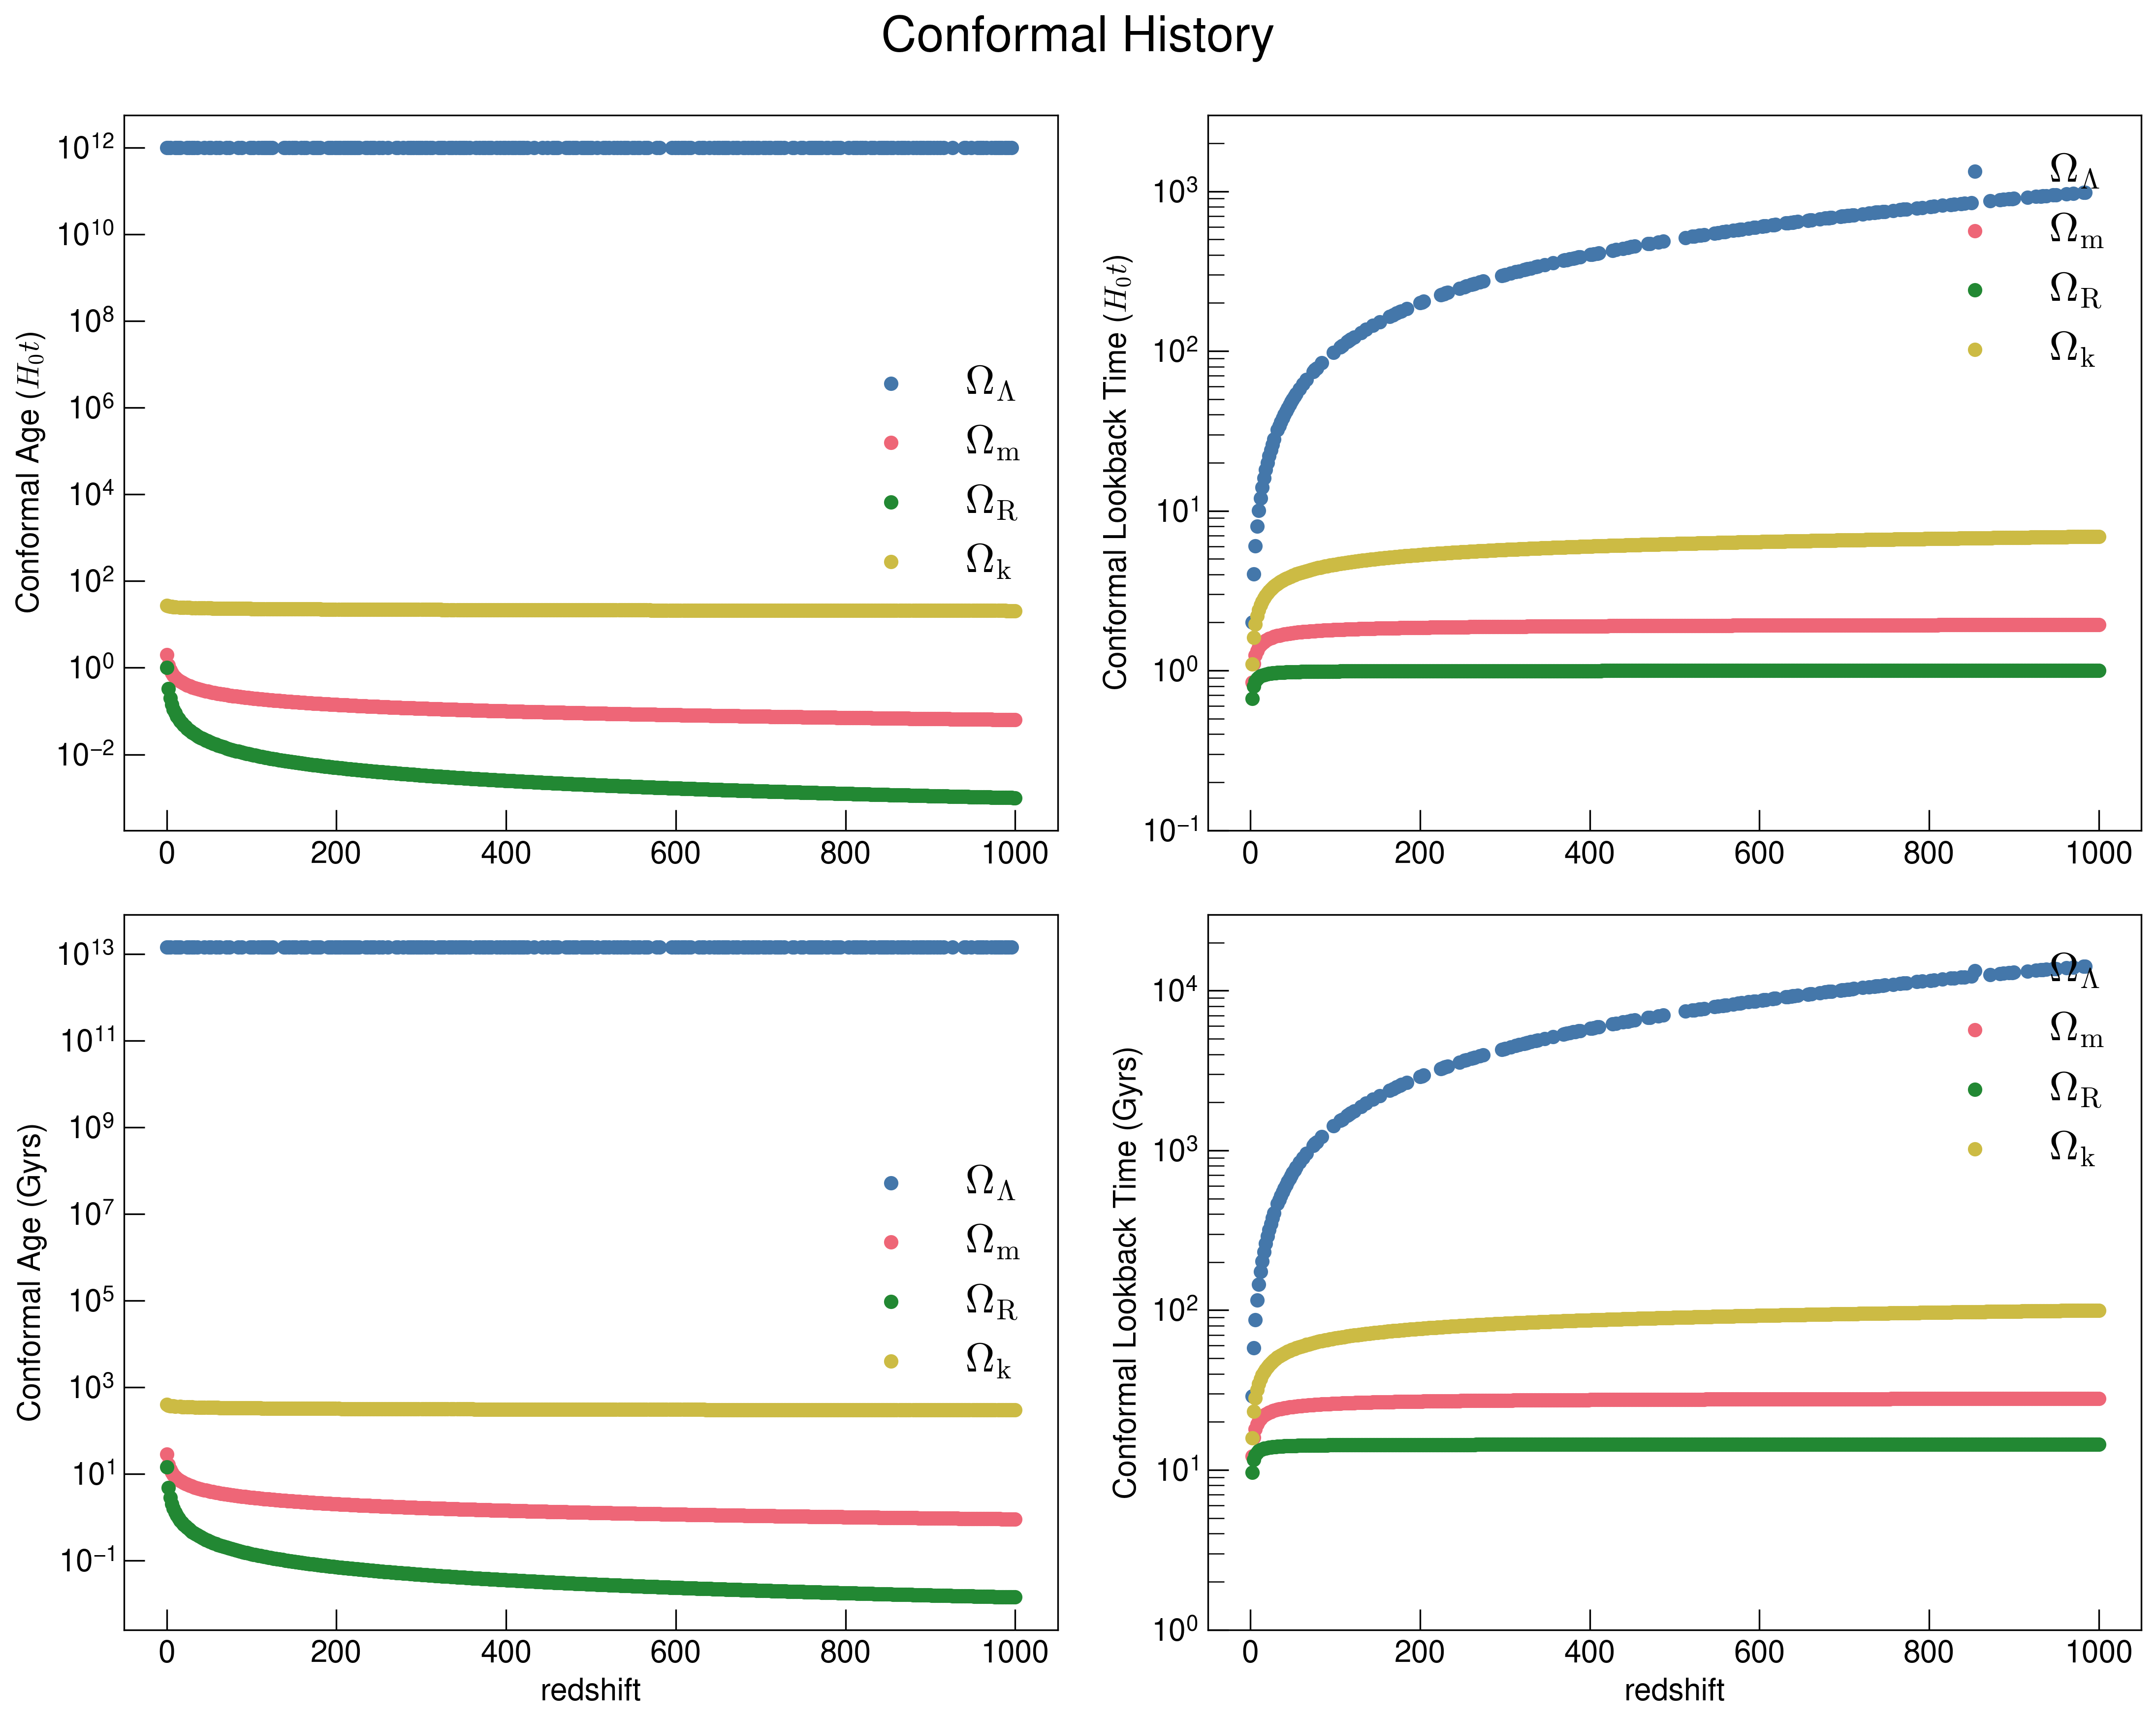

In [46]:
fig, ax = plt.subplots(figsize=(15,12), nrows=2, ncols=2)

ax[0,0].scatter(lambda_cosmo.z_arr, lambda_cosmo.time_confage, label=r'$\Omega_{\Lambda}$')
ax[0,0].scatter(matter_cosmo.z_arr, matter_cosmo.time_confage, label=r'$\Omega_{\rm{m}}$')
ax[0,0].scatter(radiation_cosmo.z_arr, radiation_cosmo.time_confage, label=r'$\Omega_{\rm{R}}$')
ax[0,0].scatter(curvature_cosmo.z_arr, curvature_cosmo.time_confage, label=r'$\Omega_{\rm{k}}$')
ax[0,0].set_yscale('log')
ax[0,0].set_ylabel(r"Conformal Age ($H_0 t$)")
ax[0,0].legend()


ax[0,1].scatter(lambda_cosmo.z_arr, lambda_cosmo.time_conf, label=r'$\Omega_{\Lambda}$')
ax[0,1].scatter(matter_cosmo.z_arr, matter_cosmo.time_conf, label=r'$\Omega_{\rm{m}}$')
ax[0,1].scatter(radiation_cosmo.z_arr, radiation_cosmo.time_conf, label=r'$\Omega_{\rm{R}}$')
ax[0,1].scatter(curvature_cosmo.z_arr, curvature_cosmo.time_conf, label=r'$\Omega_{\rm{k}}$')
ax[0,1].set_yscale('log')
ax[0,1].set_ylim(1e-1, 3e3)
ax[0,1].set_ylabel(r"Conformal Lookback Time ($H_0 t$)")
ax[0,1].legend()


ax[1,0].scatter(lambda_cosmo.z_arr, lambda_cosmo.time_confage_Gyr, label=r'$\Omega_{\Lambda}$')
ax[1,0].scatter(matter_cosmo.z_arr, matter_cosmo.time_confage_Gyr, label=r'$\Omega_{\rm{m}}$')
ax[1,0].scatter(radiation_cosmo.z_arr, radiation_cosmo.time_confage_Gyr, label=r'$\Omega_{\rm{R}}$')
ax[1,0].scatter(curvature_cosmo.z_arr, curvature_cosmo.time_confage_Gyr, label=r'$\Omega_{\rm{k}}$')
ax[1,0].set_yscale('log')
ax[1,0].set_ylabel(r"Conformal Age (Gyrs)")
ax[1,0].set_xlabel('redshift')
ax[1,0].legend()


ax[1,1].scatter(lambda_cosmo.z_arr, lambda_cosmo.time_conf_Gyr, label=r'$\Omega_{\Lambda}$')
ax[1,1].scatter(matter_cosmo.z_arr, matter_cosmo.time_conf_Gyr, label=r'$\Omega_{\rm{m}}$')
ax[1,1].scatter(radiation_cosmo.z_arr, radiation_cosmo.time_conf_Gyr, label=r'$\Omega_{\rm{R}}$')
ax[1,1].scatter(curvature_cosmo.z_arr, curvature_cosmo.time_conf_Gyr, label=r'$\Omega_{\rm{k}}$')
ax[1,1].set_yscale('log')
ax[1,1].set_ylim(1e0, 3e4)
ax[1,1].set_ylabel(r"Conformal Lookback Time (Gyrs)")
ax[1,1].set_xlabel('redshift')
ax[1,1].legend()


fig.suptitle(r"Conformal History")

fig.tight_layout()